<a href="https://colab.research.google.com/github/SuhelAnsari9272/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Suhel_Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import re
lemmatizer = WordNetLemmatizer()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Coronavirus Tweets.csv'
df = pd.read_csv(path,encoding='latin-1')

In [ ]:
#overview of the data
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
#basic statistics of numeric varibles
df.describe(include='int')

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

In [ ]:
#basic statistics of non-nummeric data
df.describe(include='object')

Location     TweetAt  \
count     32567       41157   
unique    12220          30   
top      London  20-03-2020   
freq        540        3448   

                                            OriginalTweet Sentiment  
count                                               41157     41157  
unique                                              41157         5  
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive  
freq                                                    1     11422

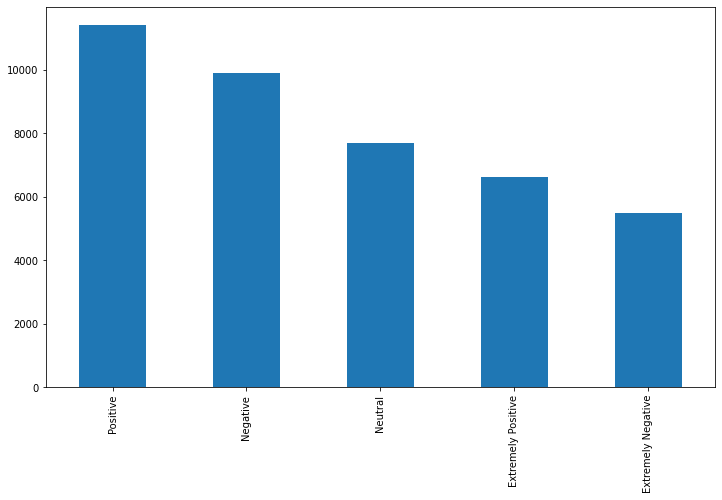

In [ ]:
# Count plot of the target variable
plt.figure(figsize=(12,7))
df.Sentiment.value_counts().plot(kind='bar')
plt.show()

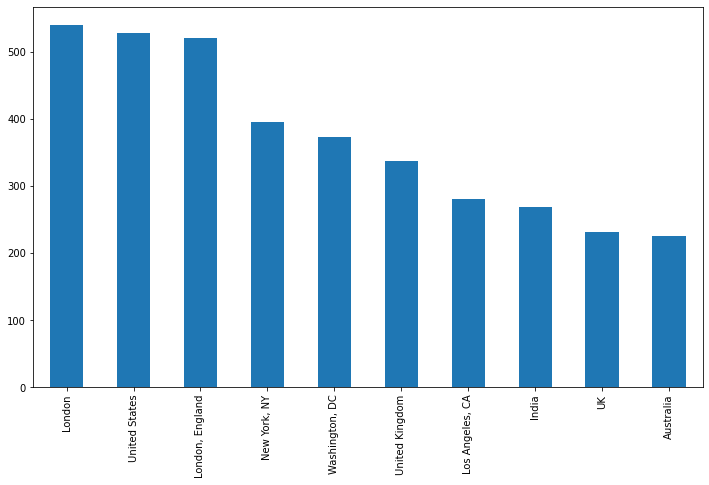

In [ ]:
# Tweets from top 10 locations
plt.figure(figsize=(12,7))
df.Location.value_counts()[:10].plot(kind='bar')
plt.show()

In [ ]:
# Loooking for hash trends
def hashed_words(text):
  hashed_word=[]
  for x in text:
    hashed_word.append(re.findall(r'#(\w+)',x))
  return hashed_word

In [ ]:
# Dictionary to store all the hashtag trends wrt to the sentiments
sentiments = df['Sentiment'].unique()
hashed_dict = {}
for i in sentiments:
  hashed_dict[f'hashed_tags_{i}']=sum(hashed_words(df.loc[df['Sentiment']==i,'OriginalTweet']),[])

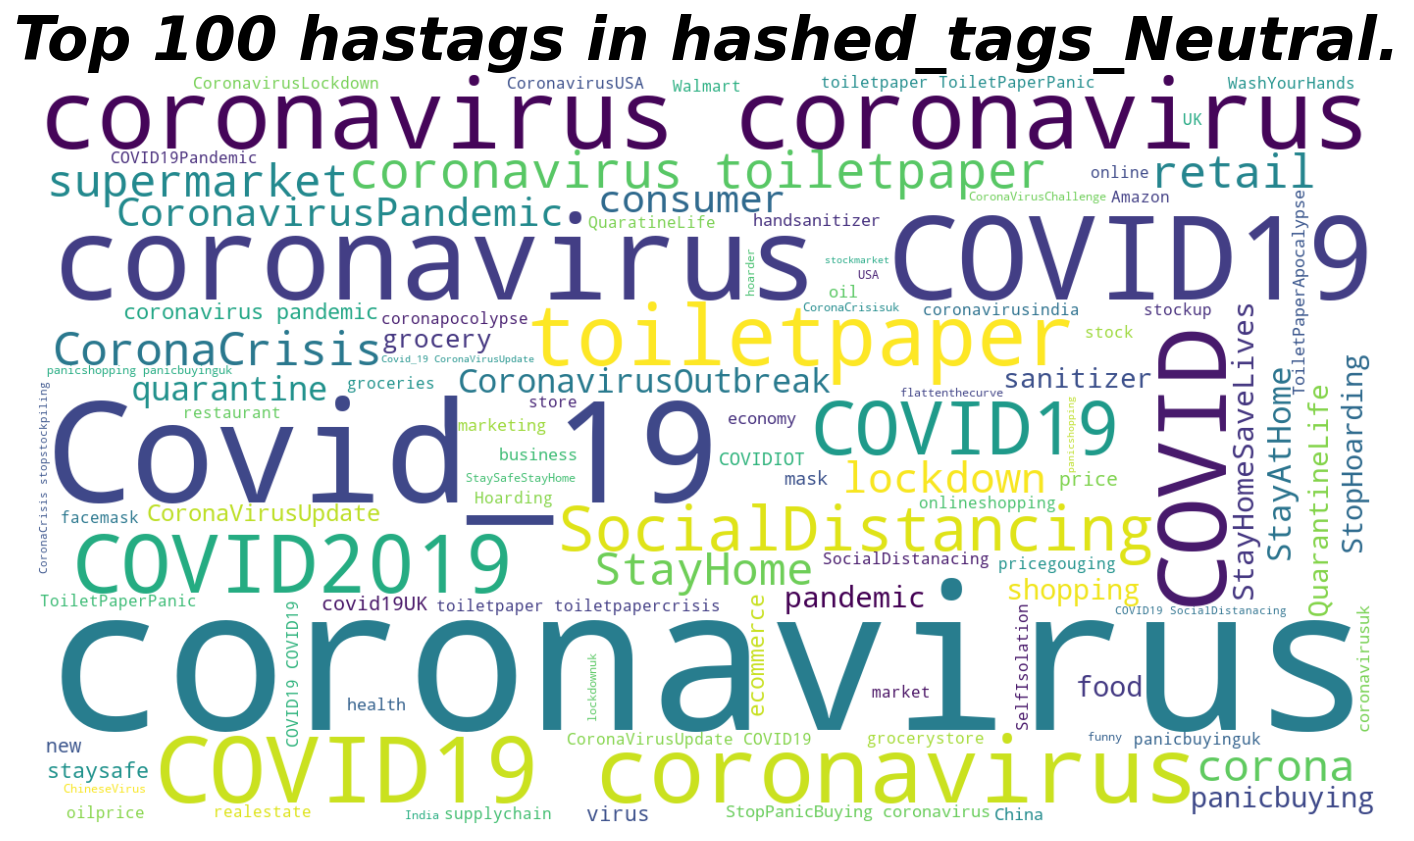

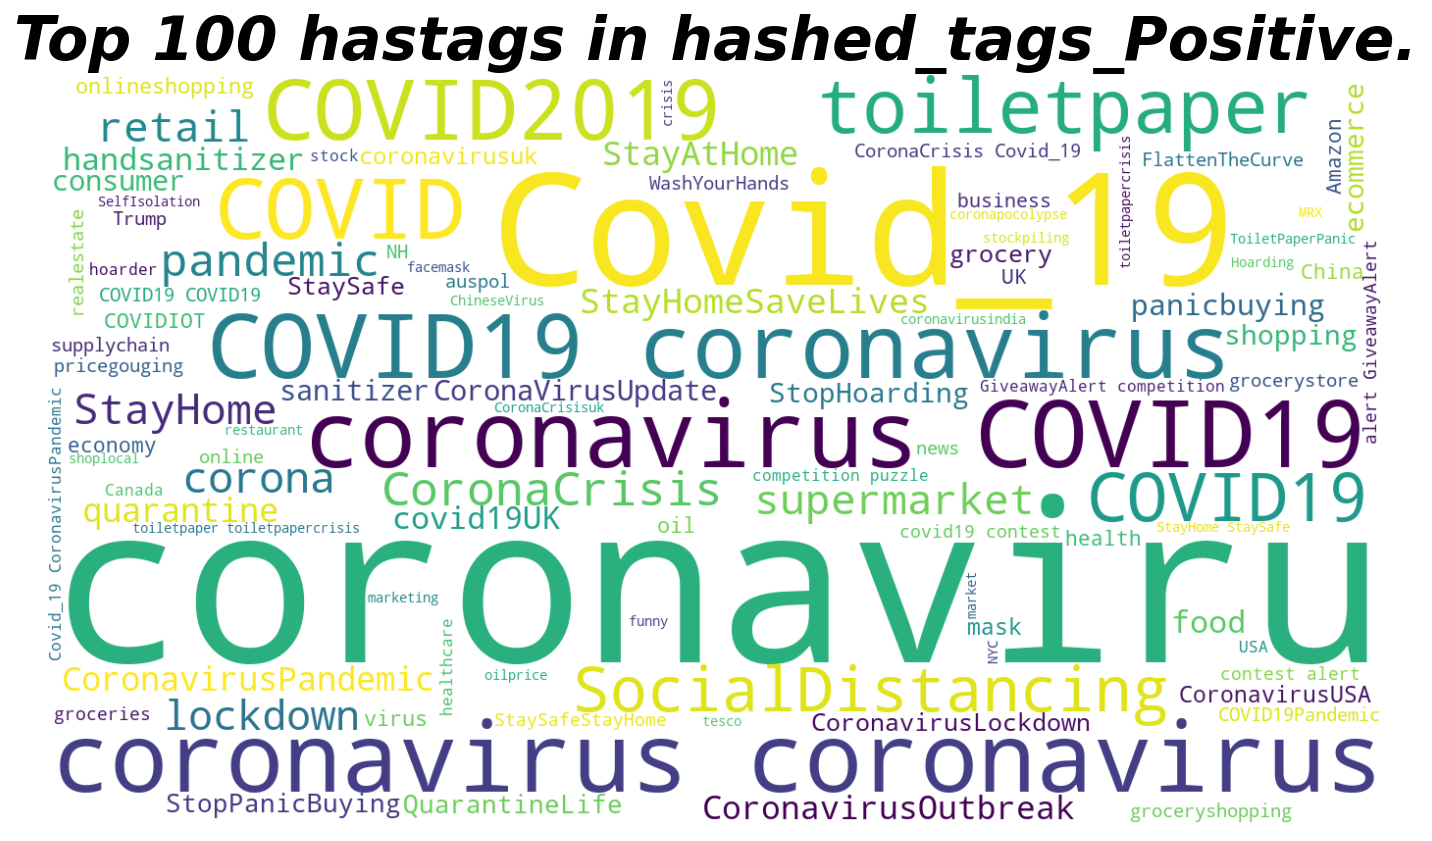

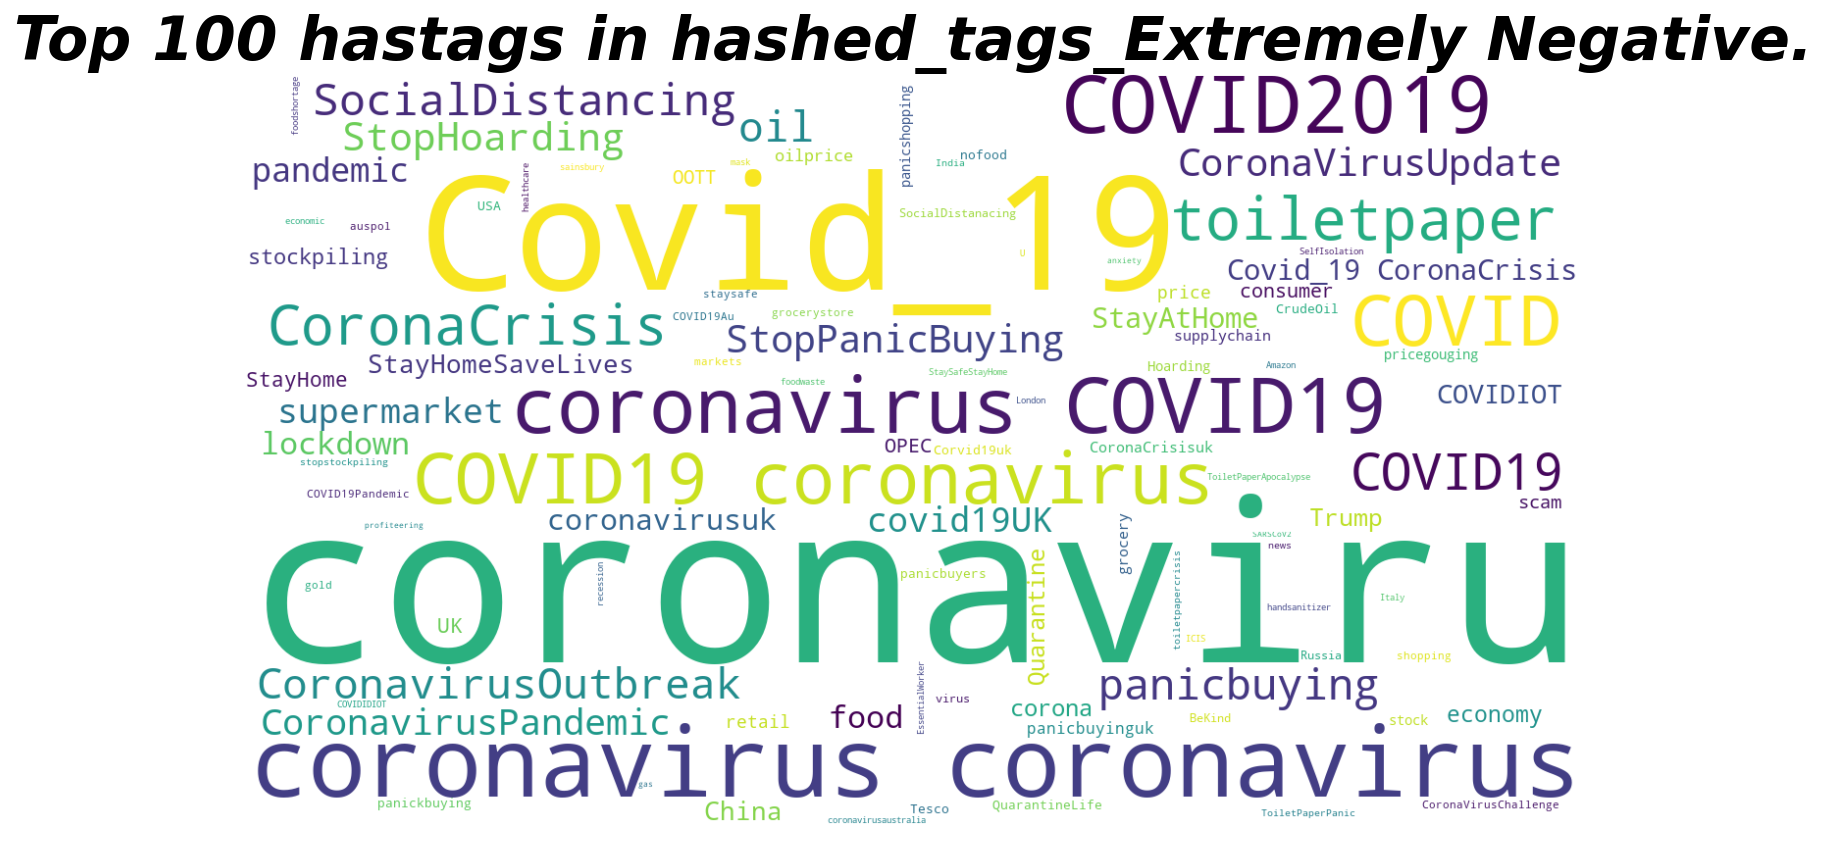

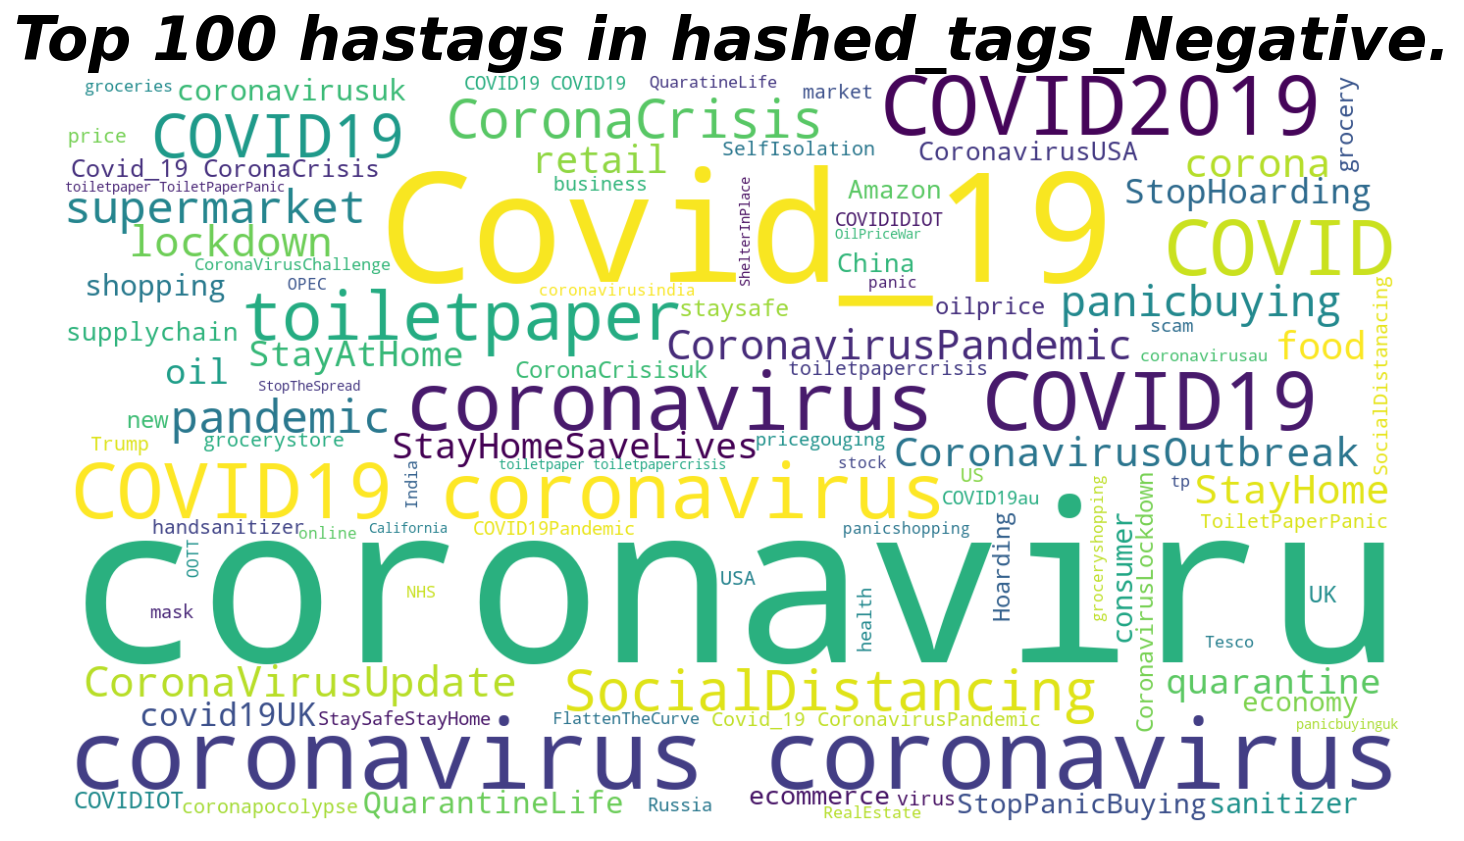

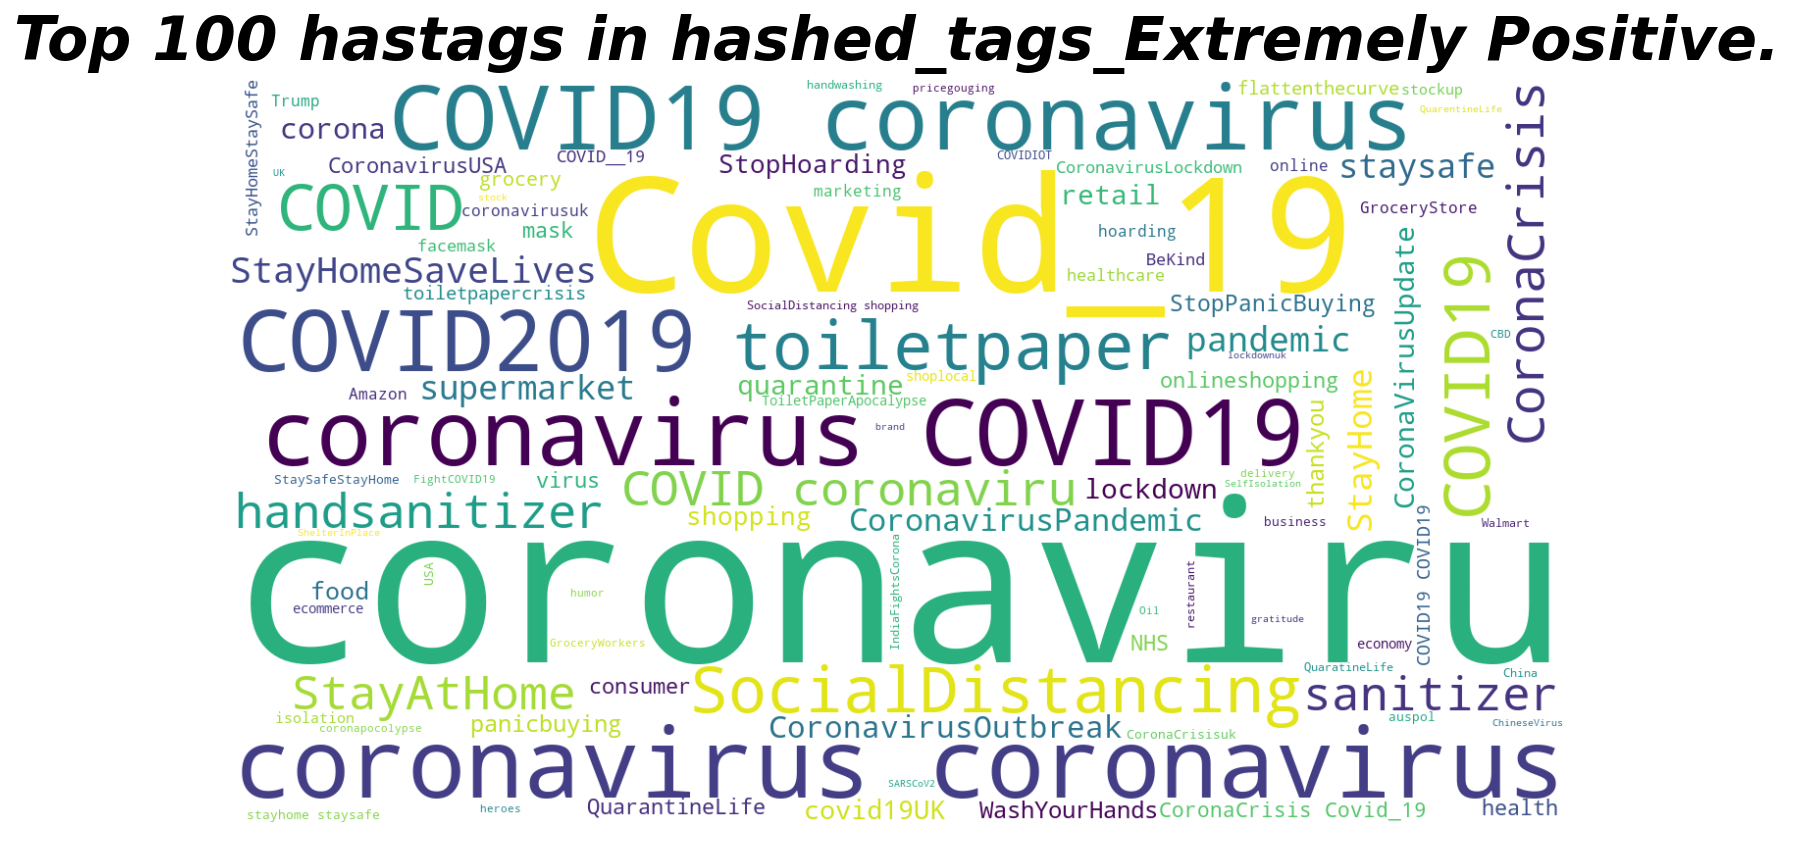

In [ ]:
# Cloud Words plot for displaying top trending hashtags for different Sentiments 
for key in hashed_dict.keys():
  normal_words = ' '.join([text for text in[text for text in hashed_dict[key]]])

  wordcloud = WordCloud(width=1366, height=768, random_state=21,max_words=100 ,max_font_size=700,background_color='white').generate(normal_words)
  plt.figure(figsize=(12, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(f'Top 100 hastags in {key}.',fontweight='bold',fontstyle='italic',fontsize=30)
  plt.axis('off')
  plt.show()
  print('\n')

In [ ]:
# Dictionary to store all the hashtag trends wrt to the Tweet date
tweet_date = df['TweetAt'].unique()
hashed_dict_tweet_date = {}
for i in tweet_date:
  hashed_dict_tweet_date[f'hashed_tags_{i}']=sum(hashed_words(df.loc[df['TweetAt']==i,'OriginalTweet']),[])

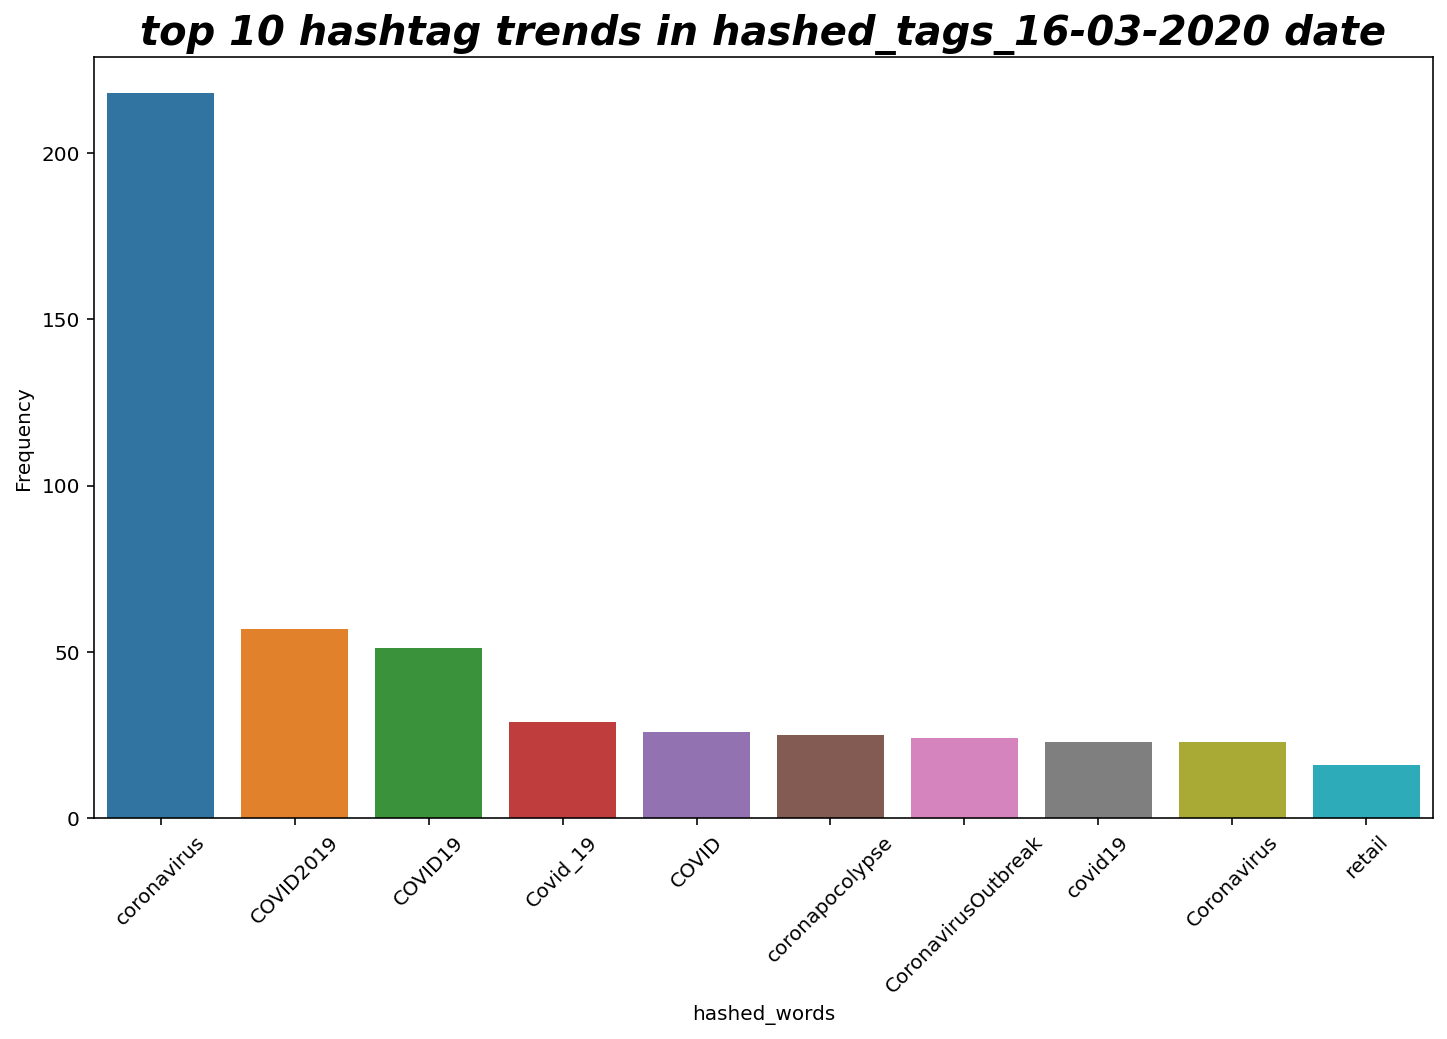

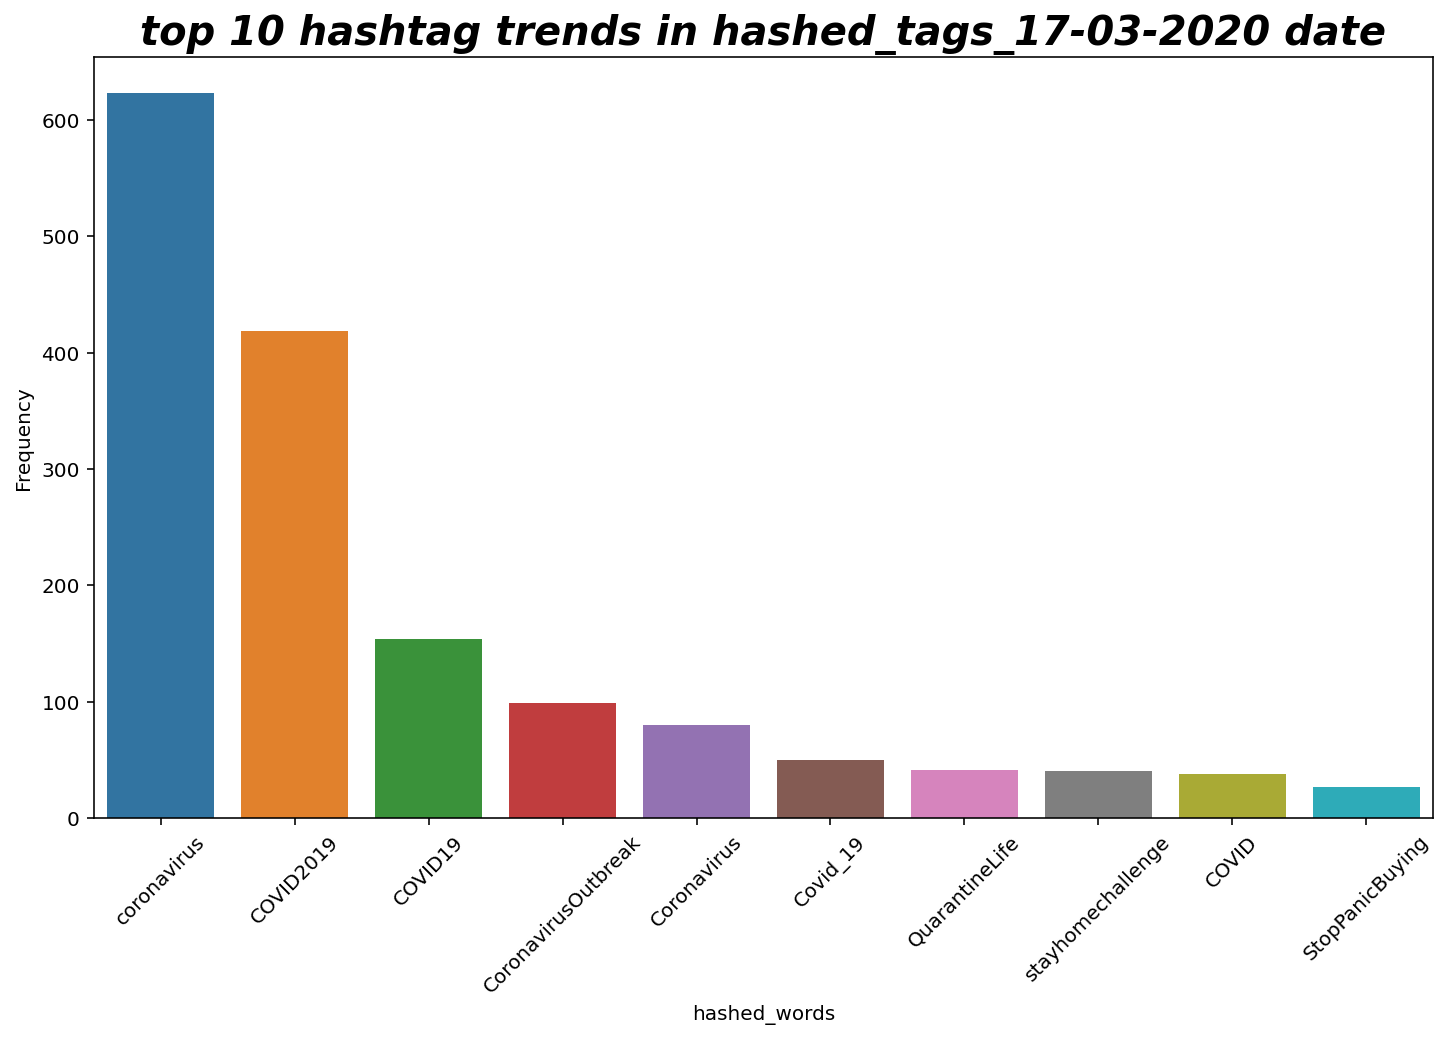

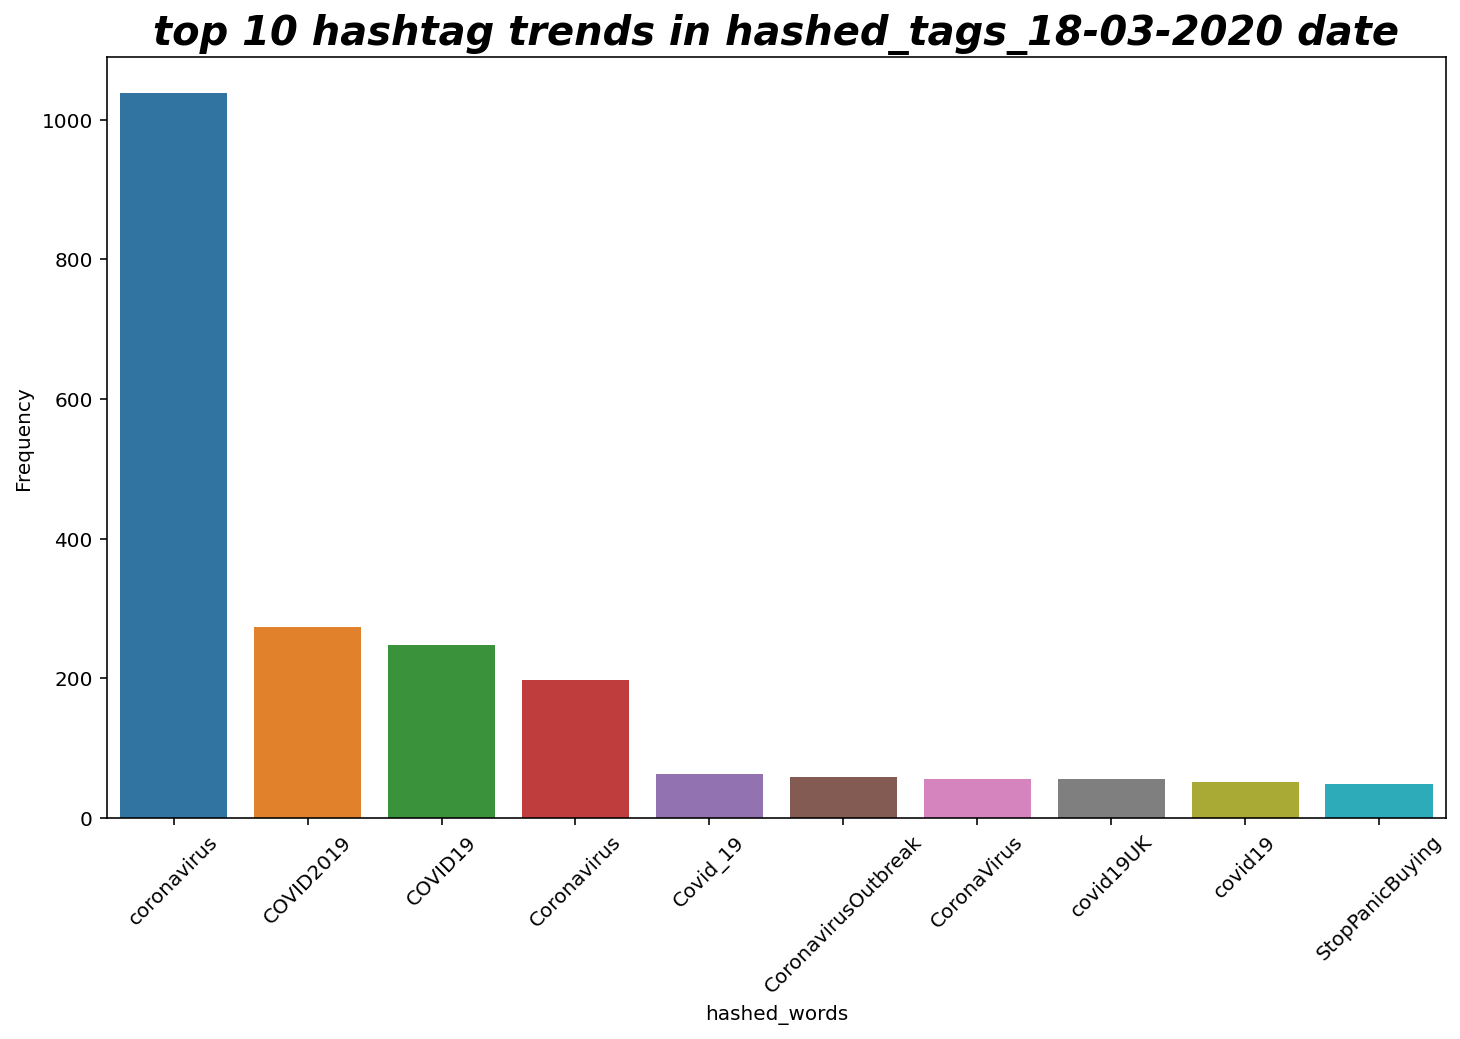

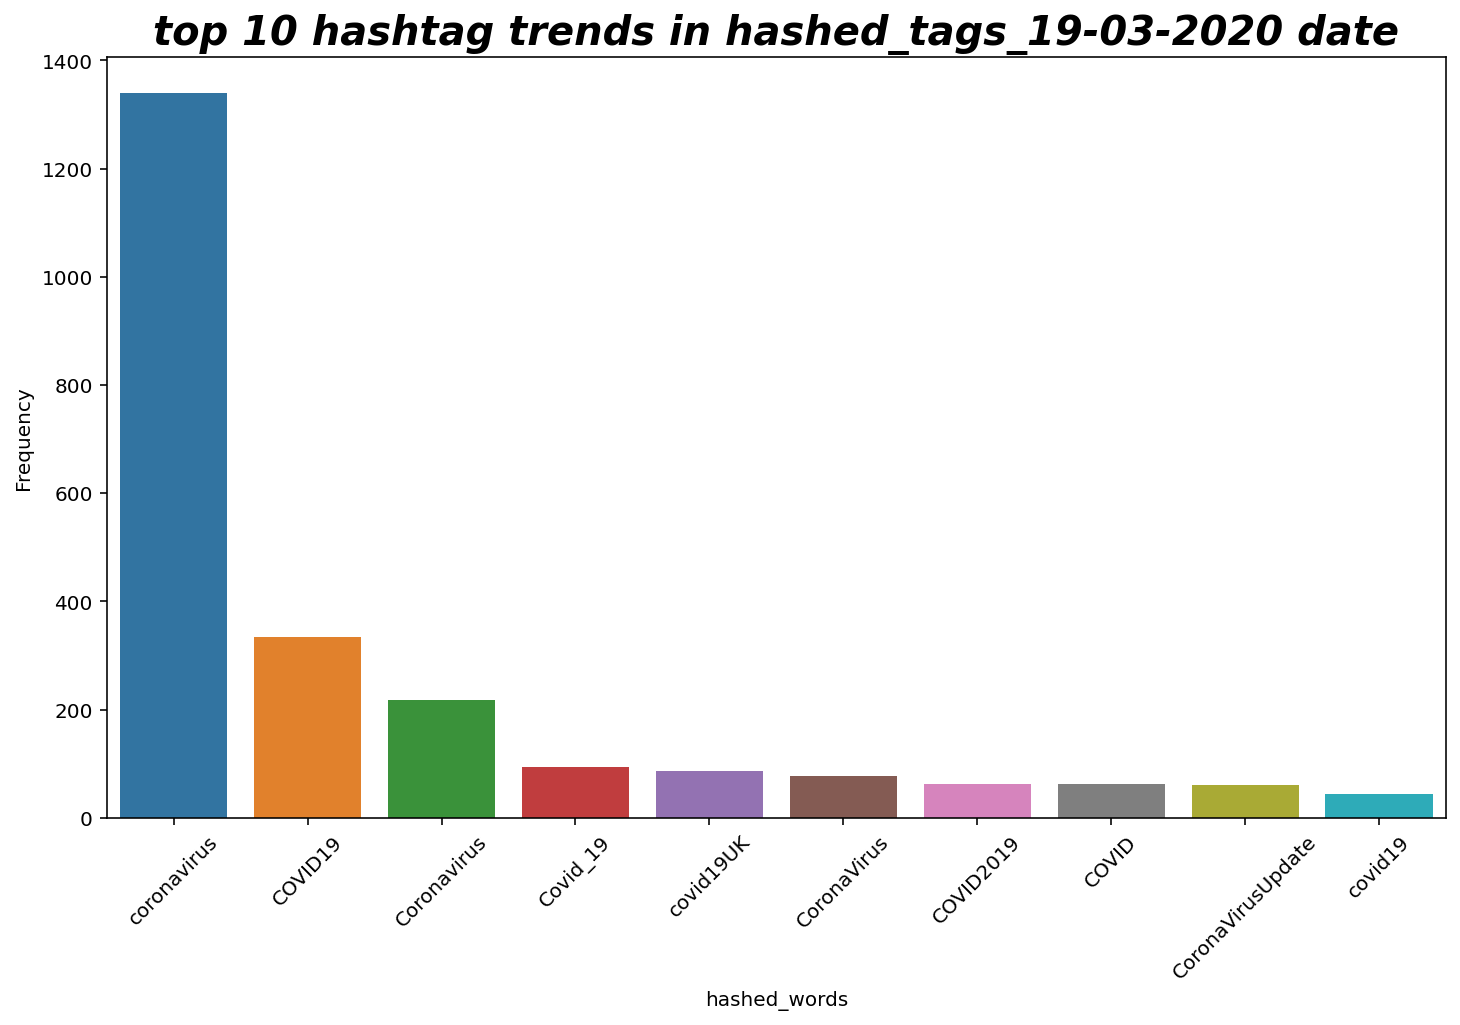

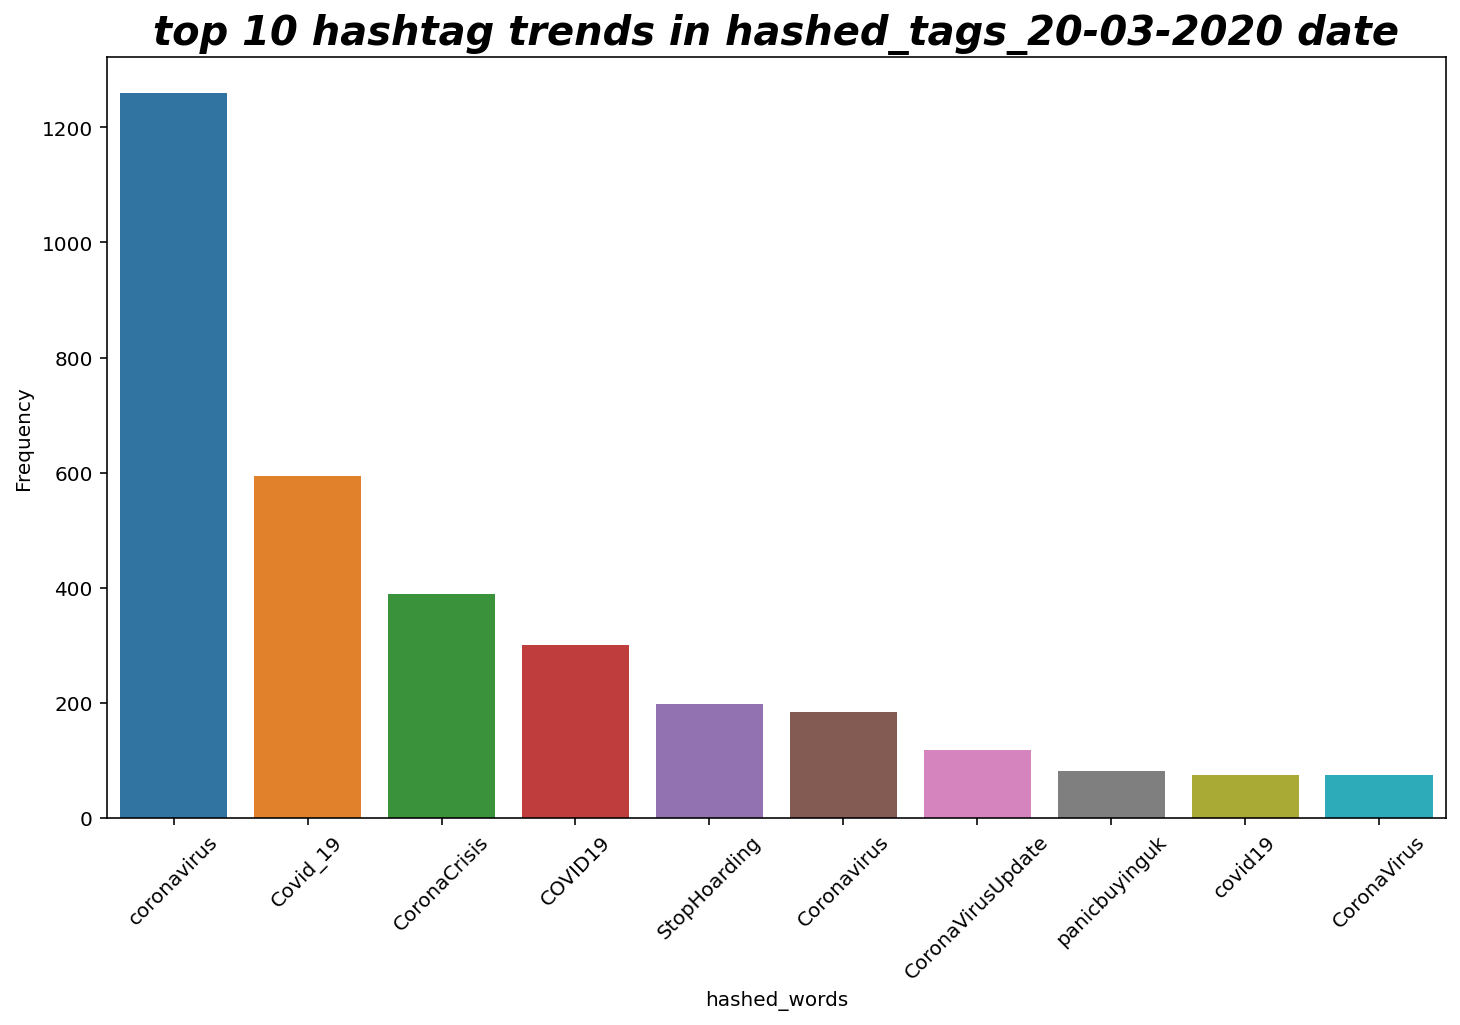

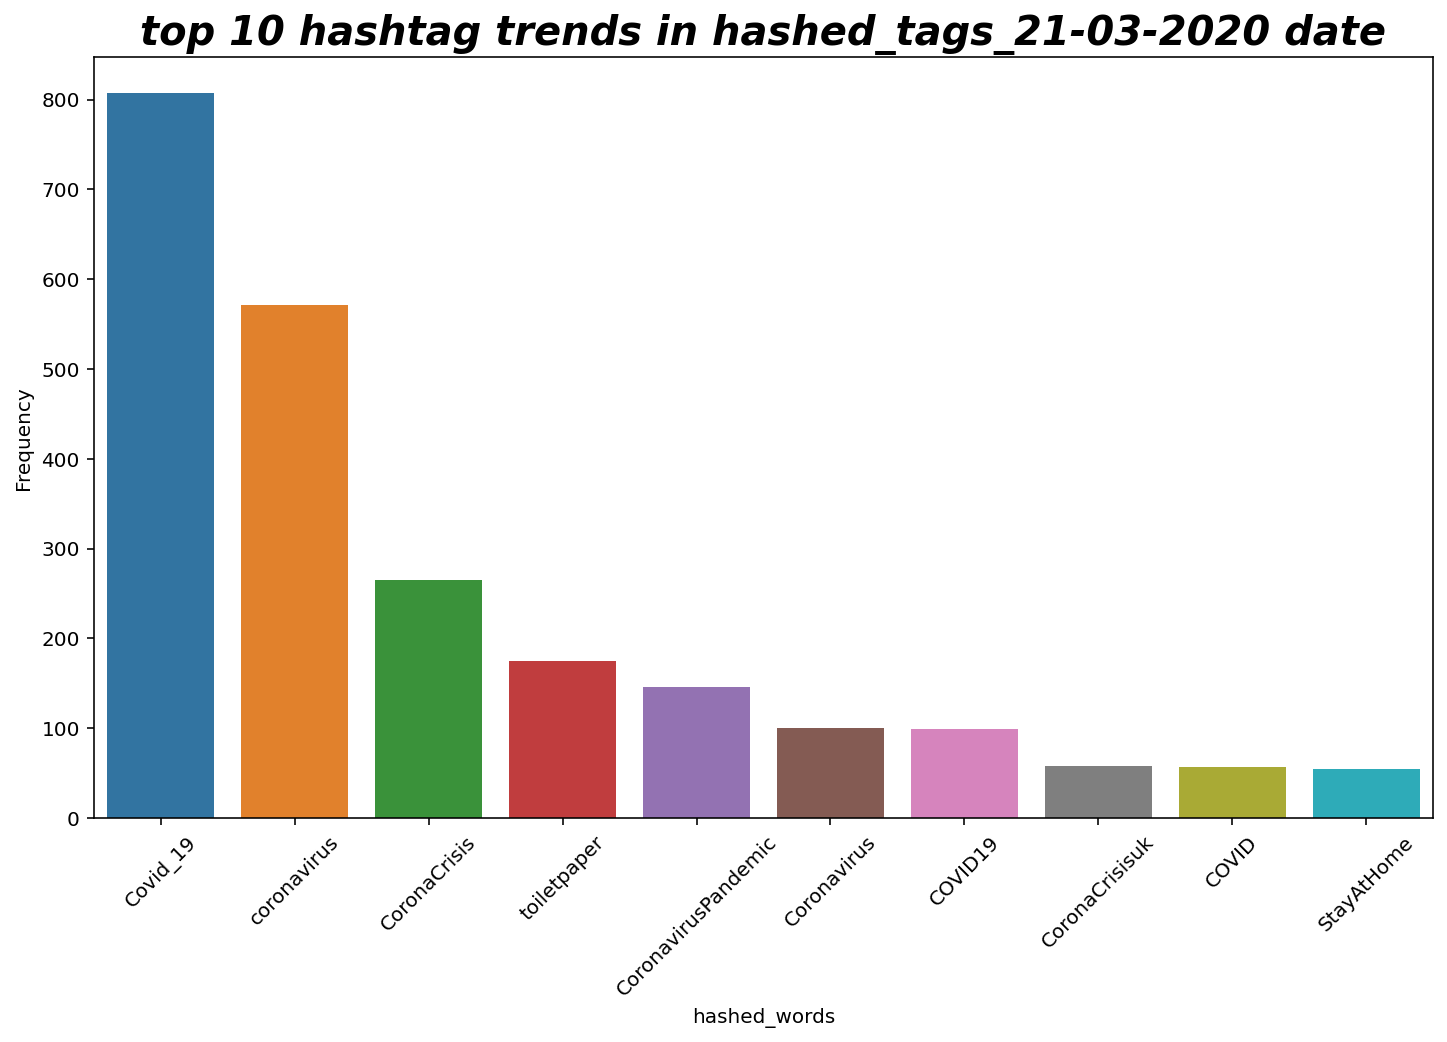

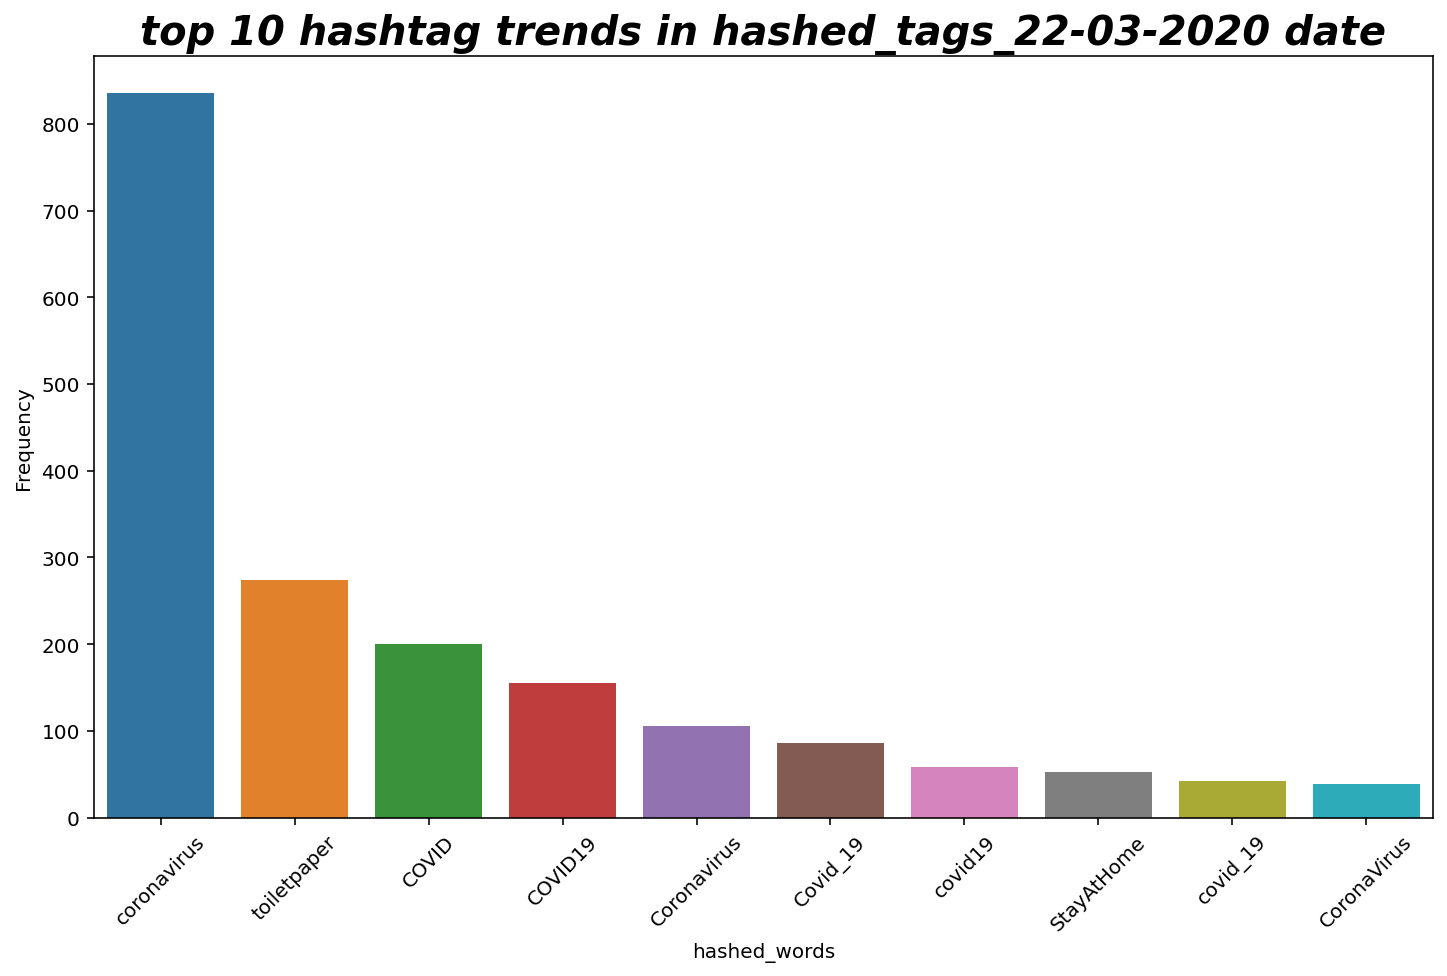

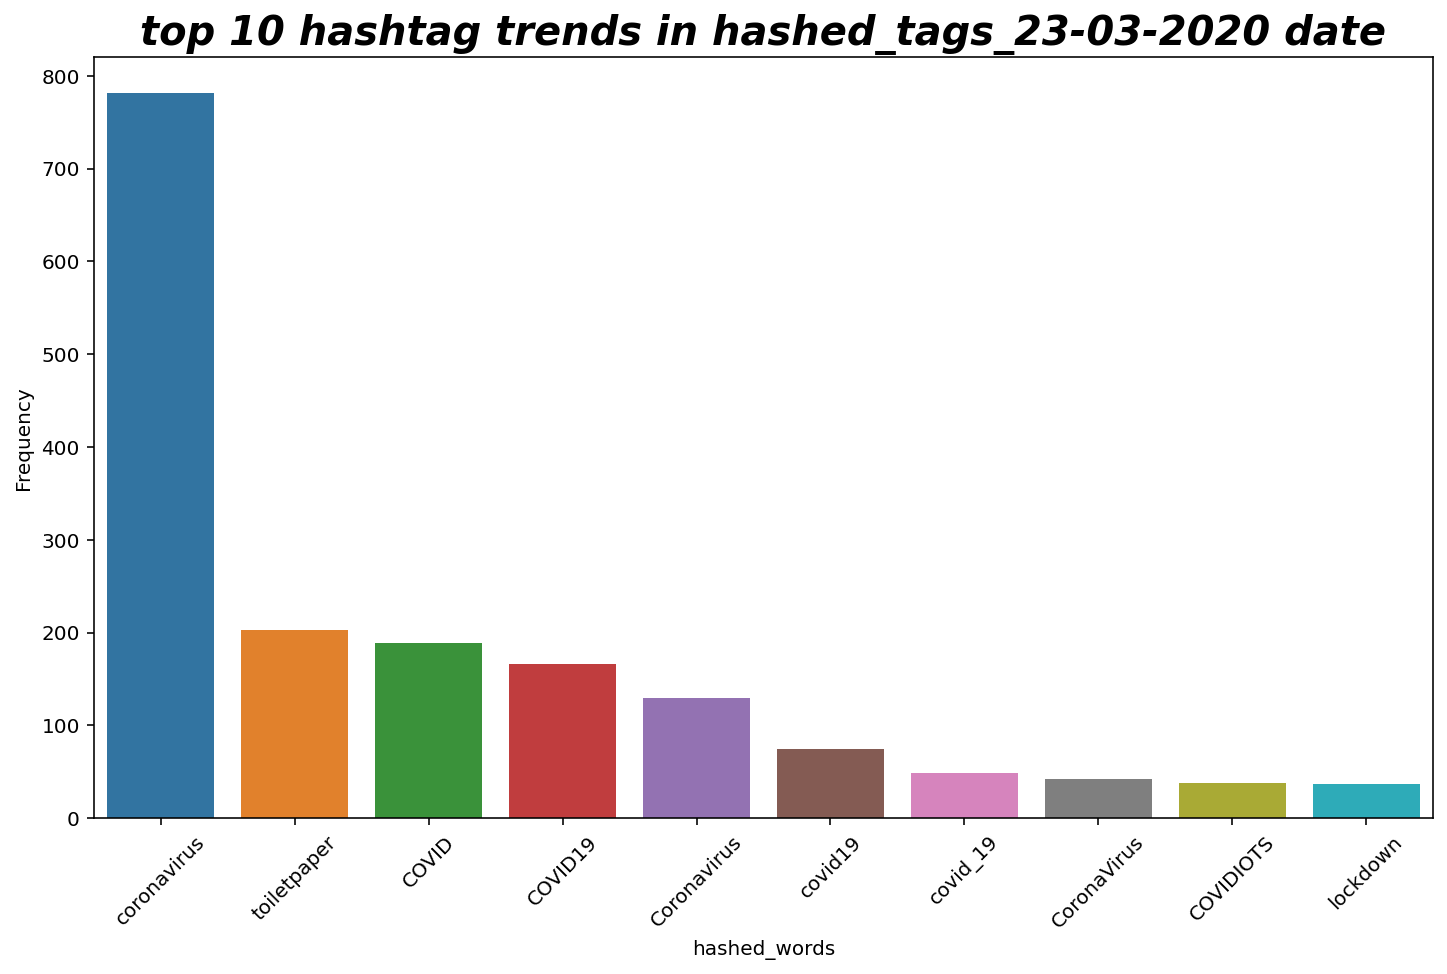

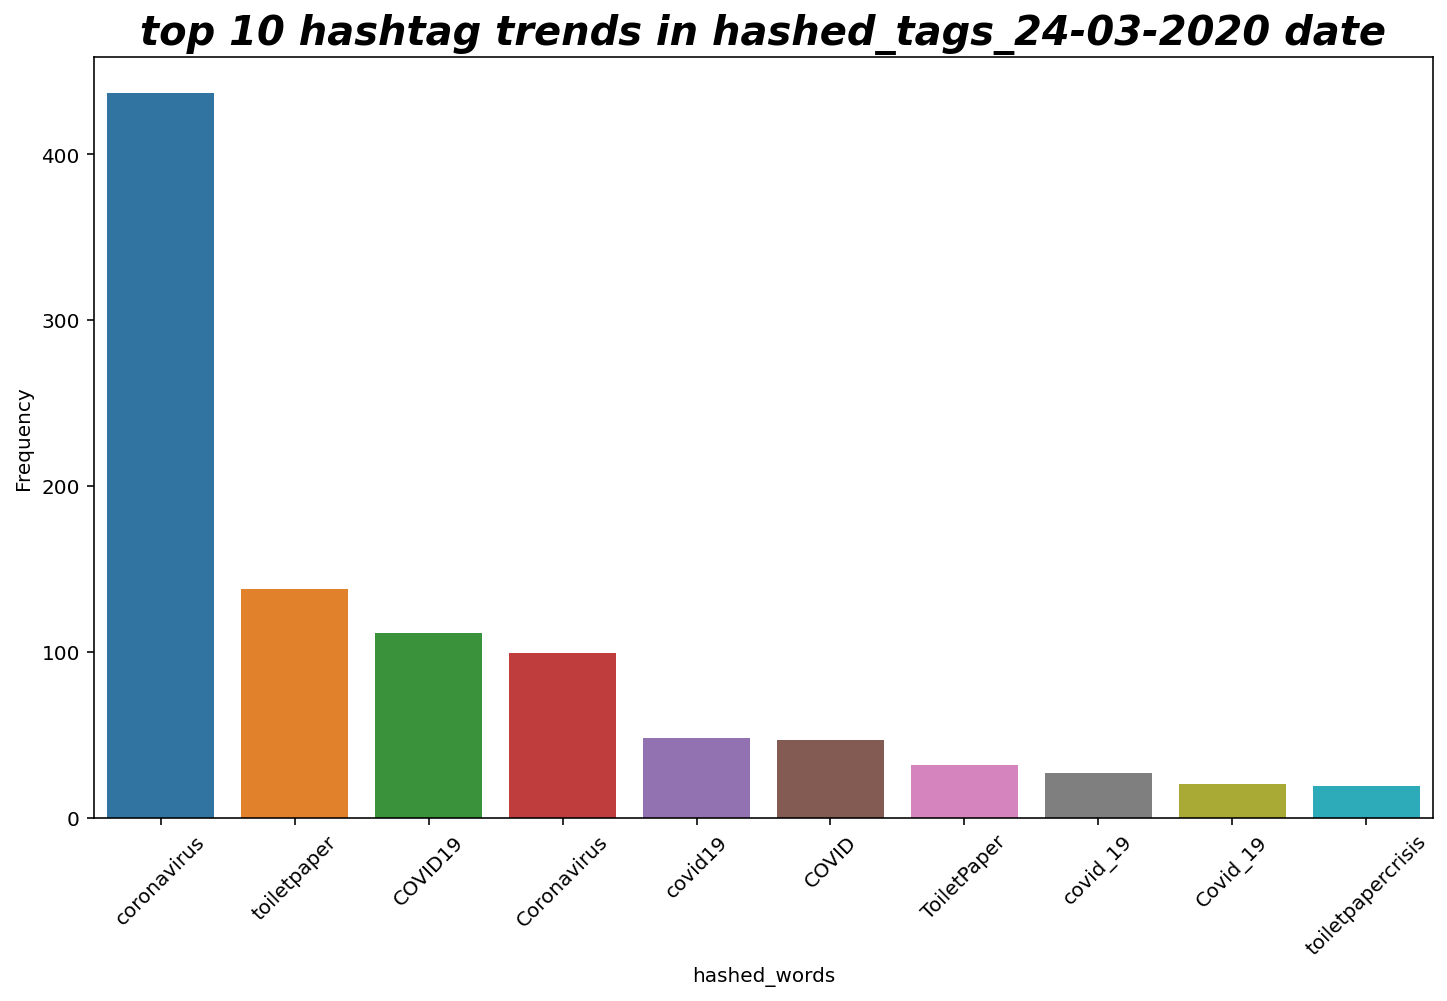

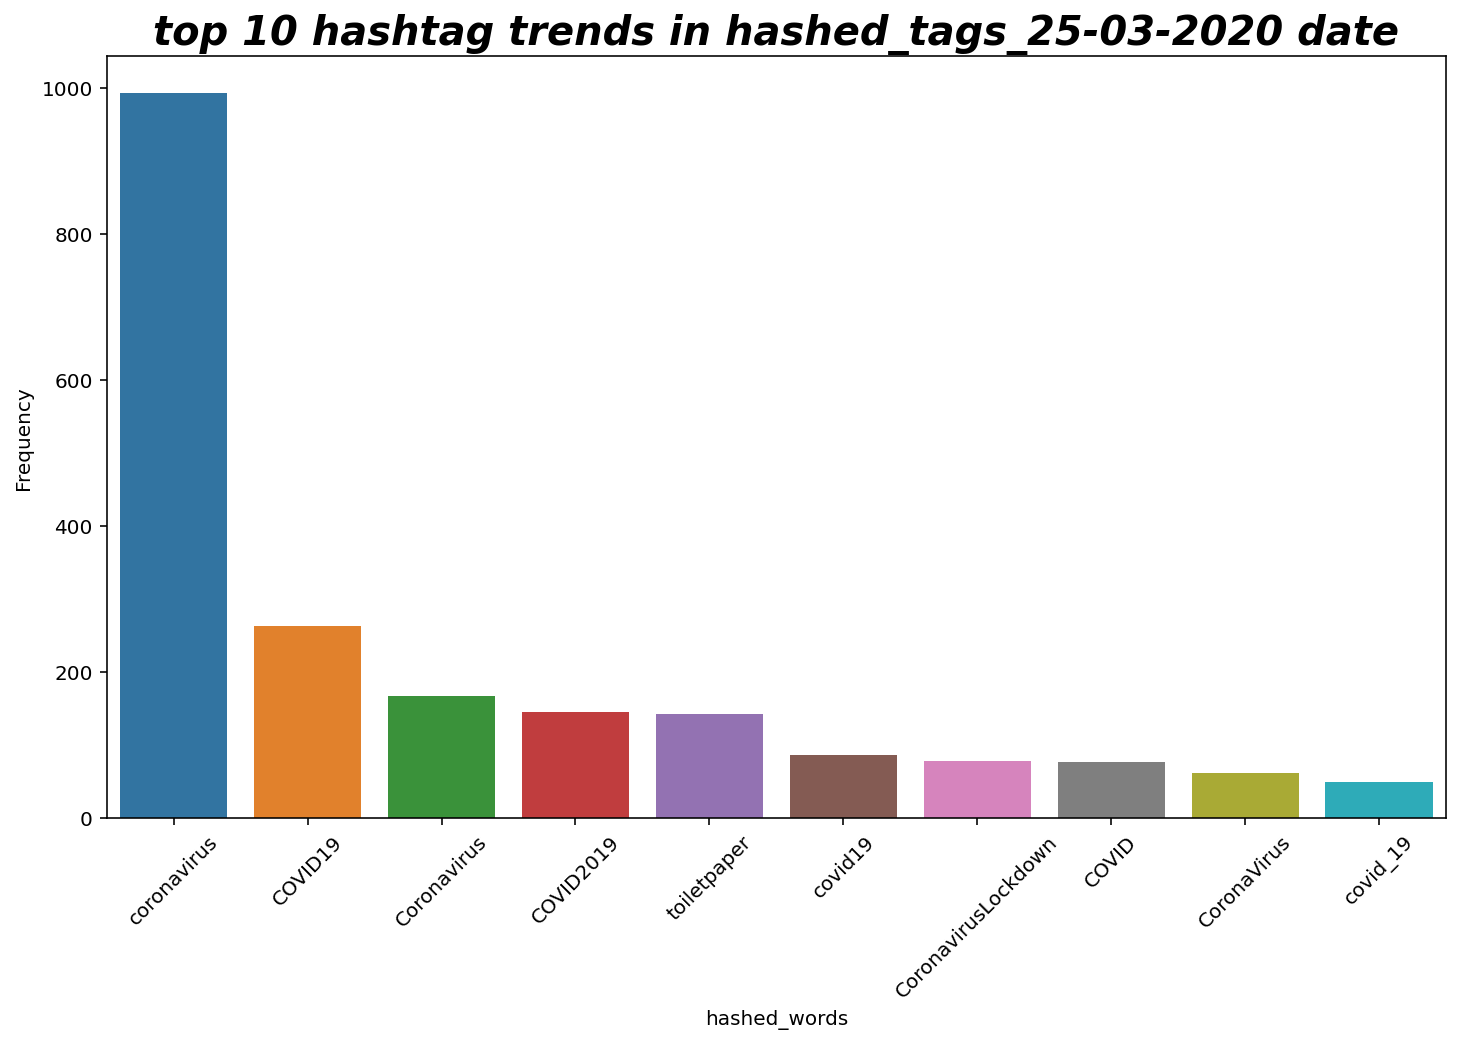

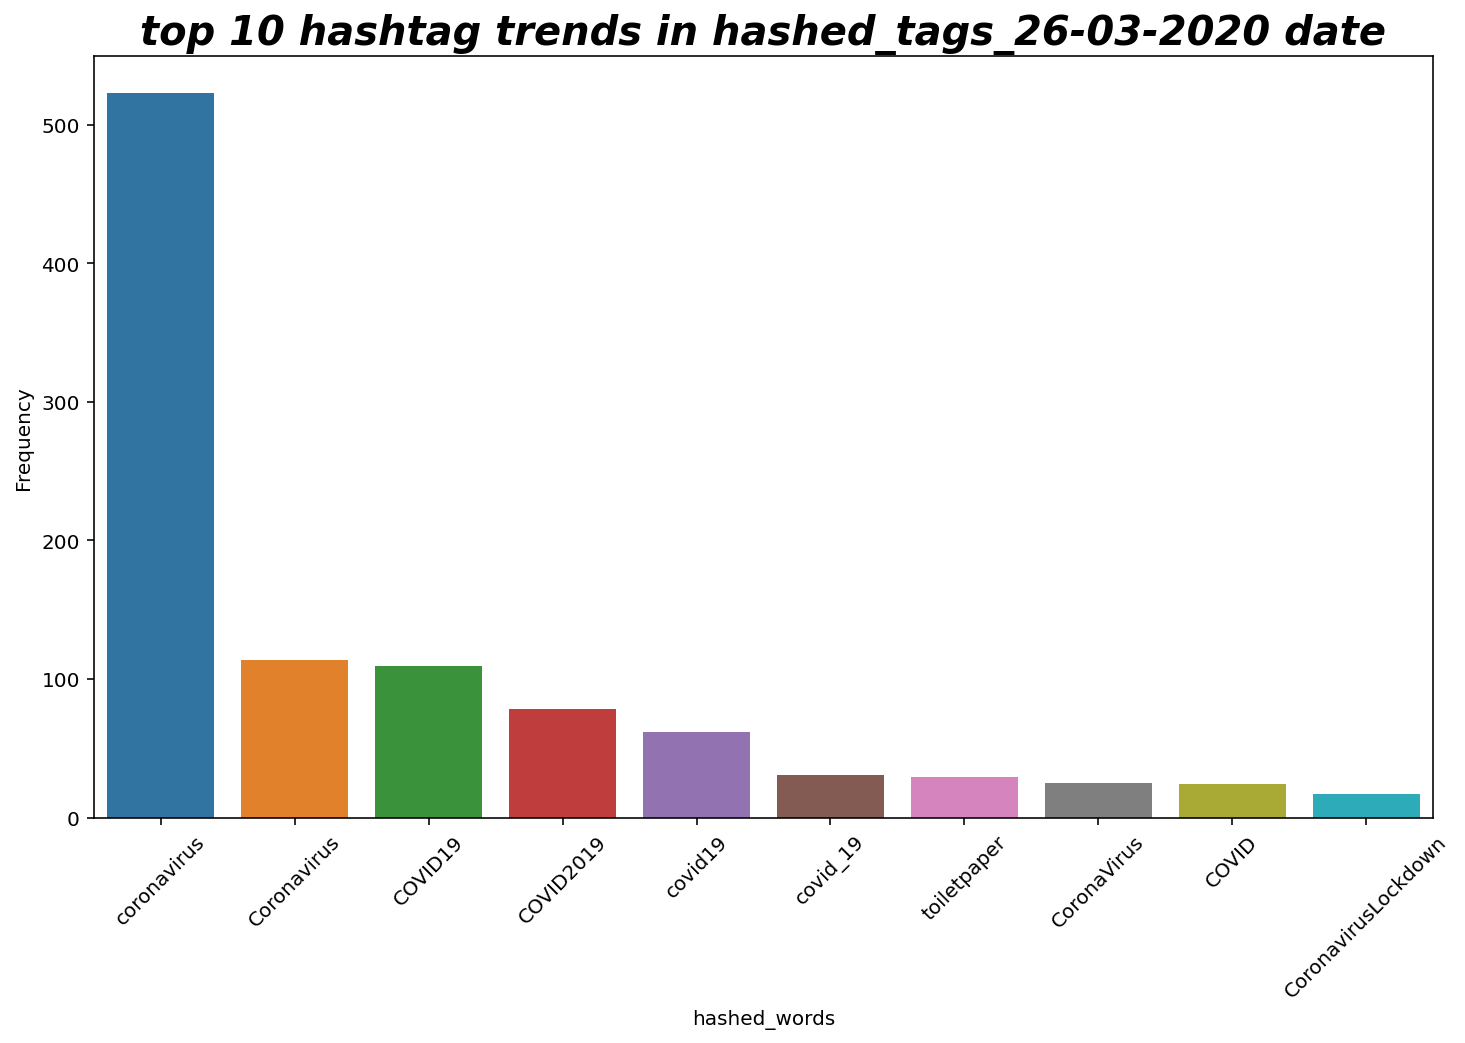

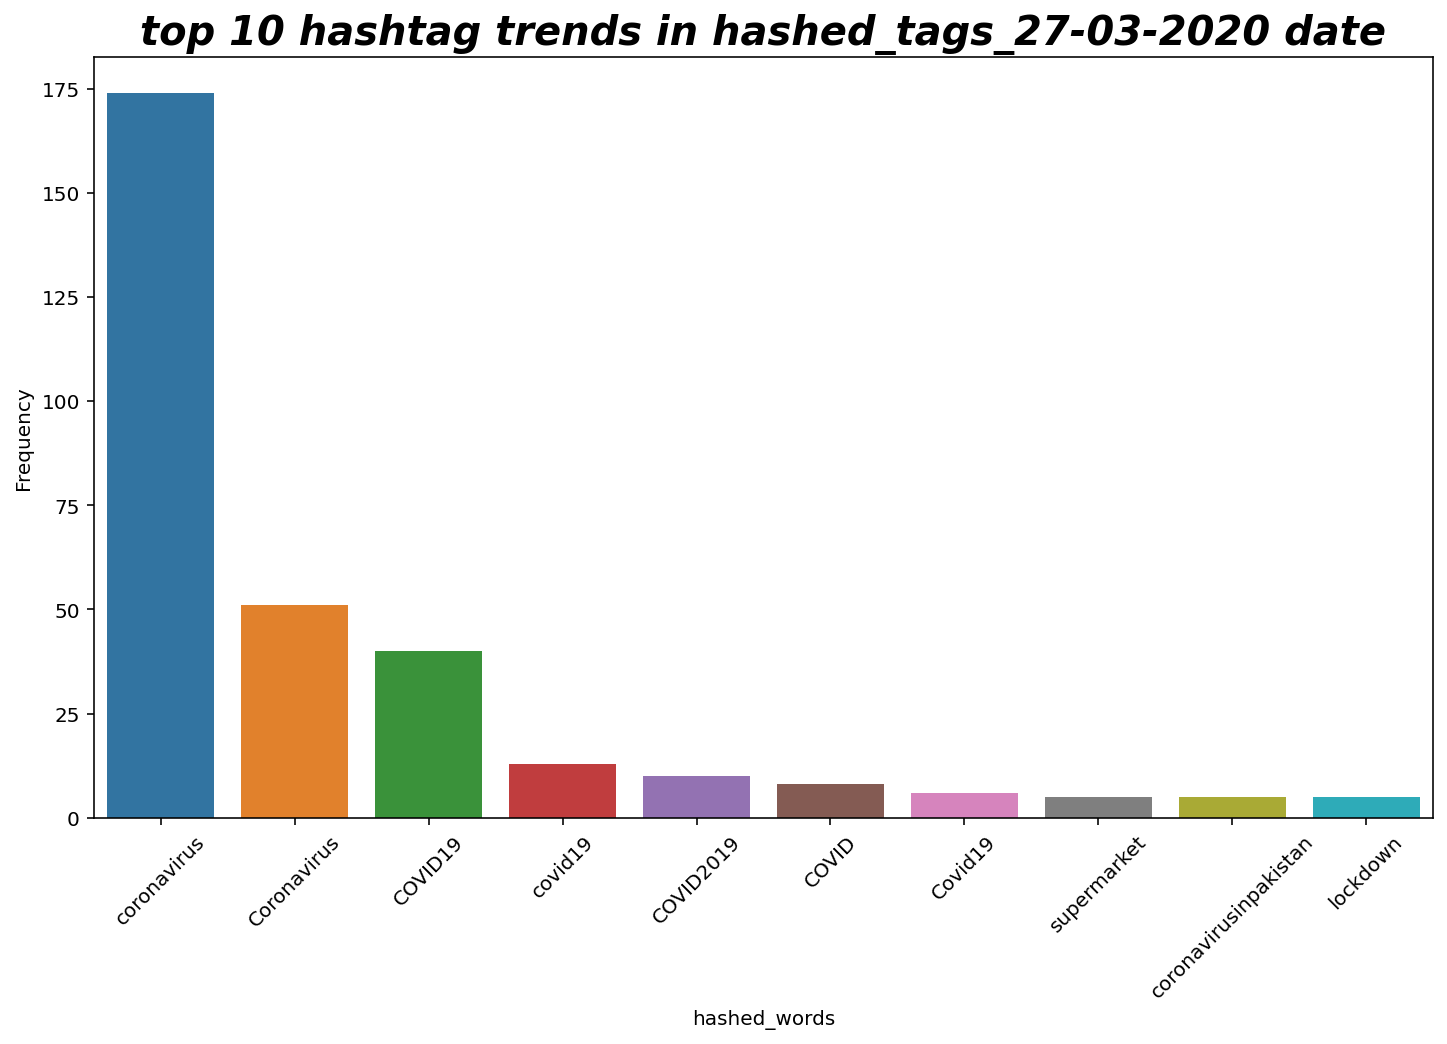

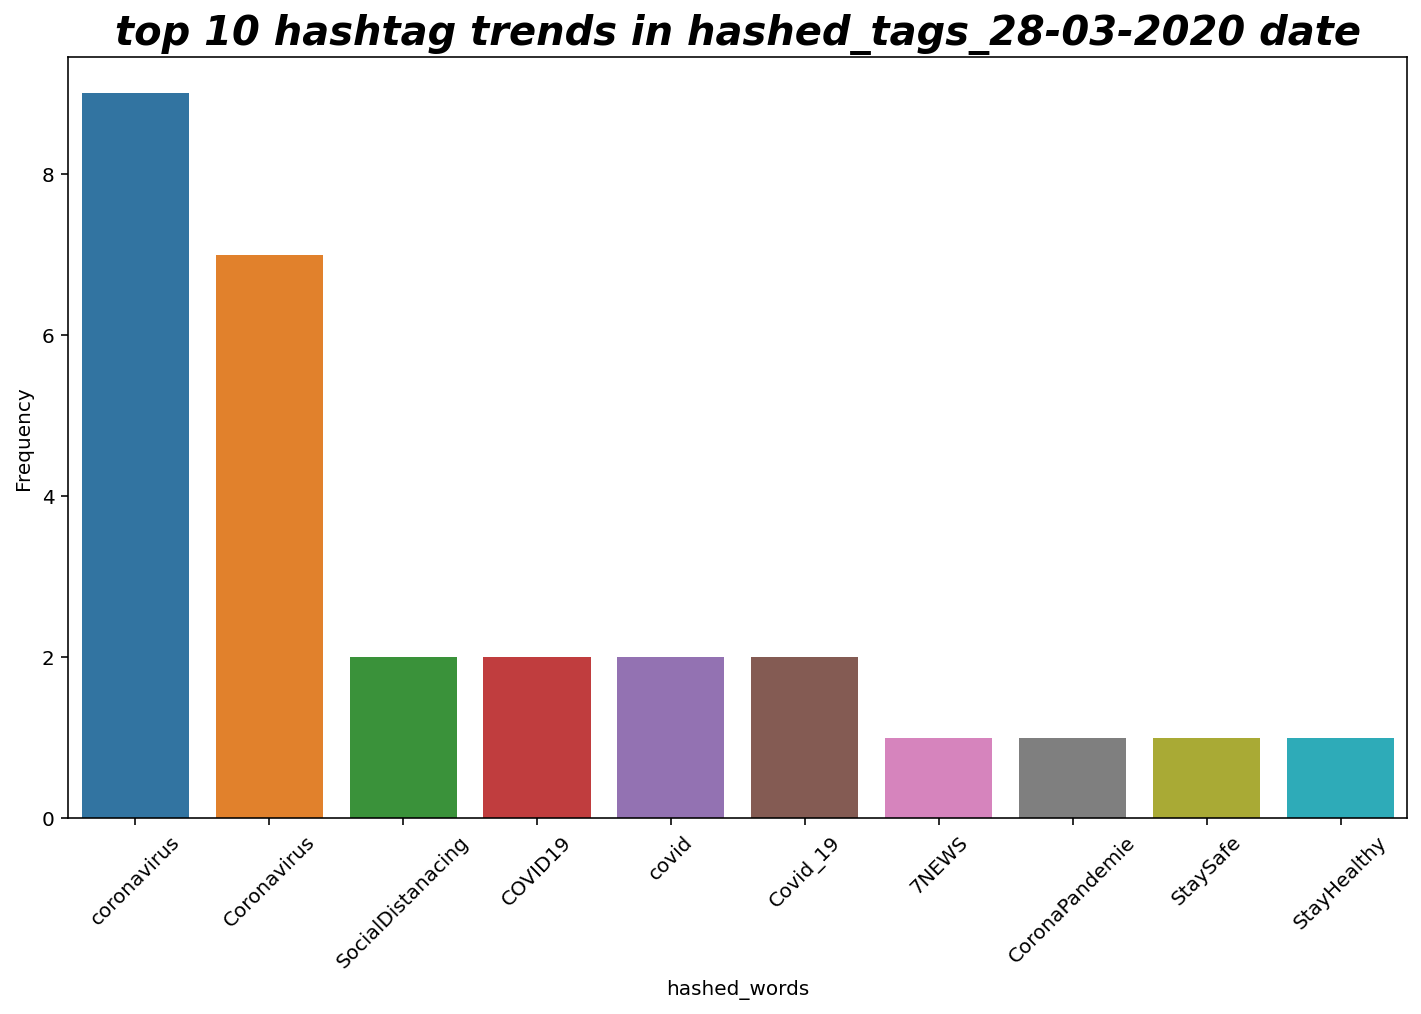

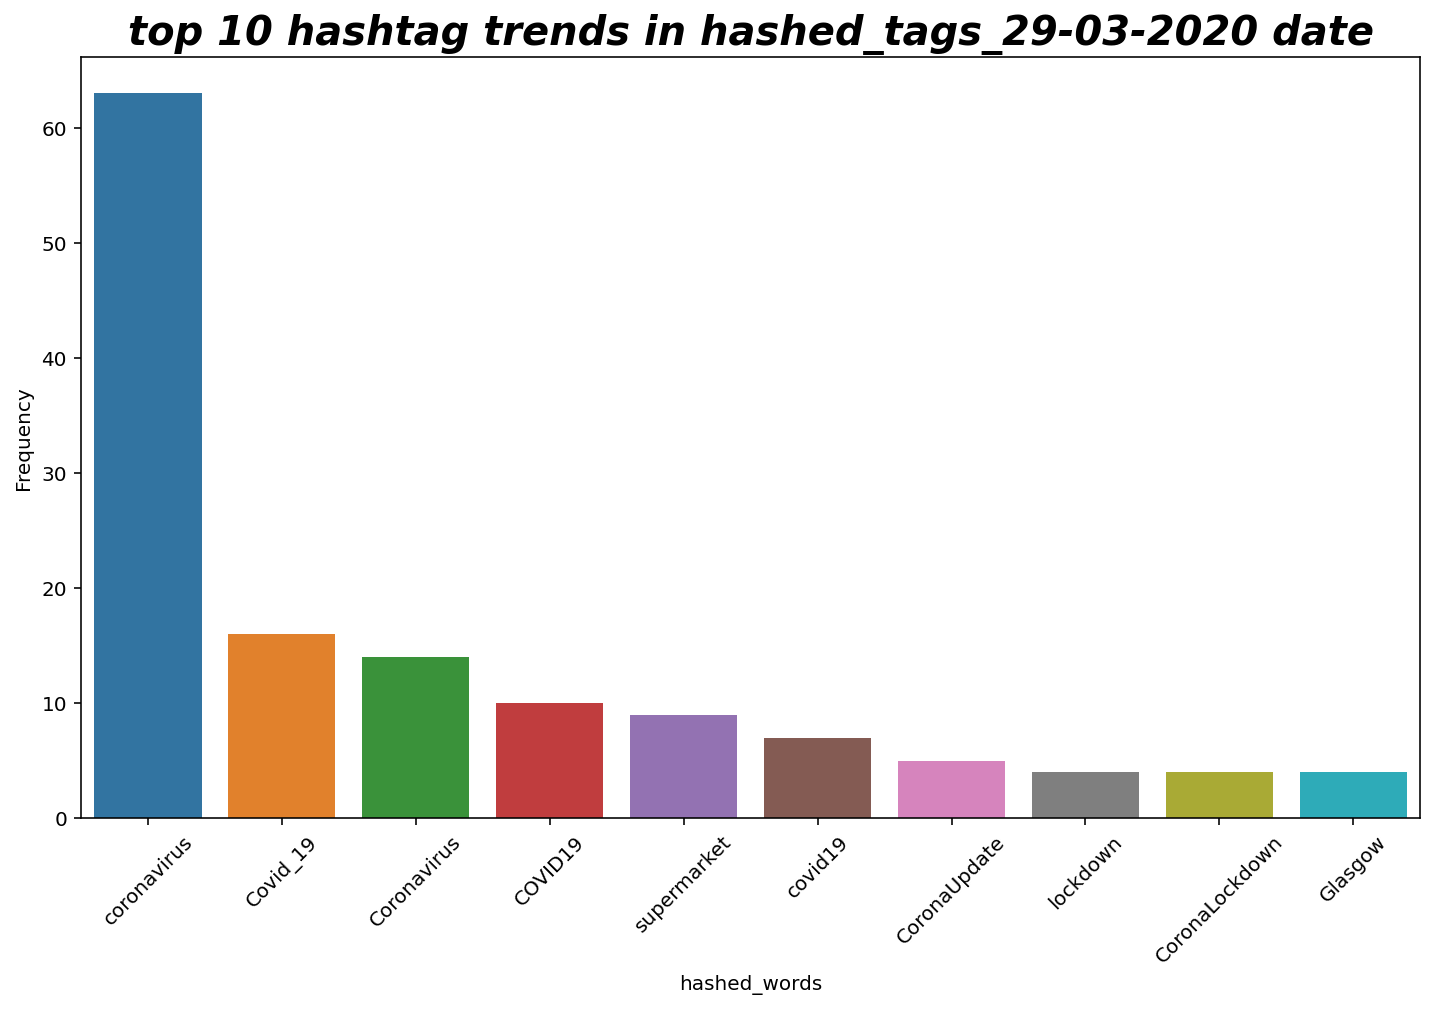

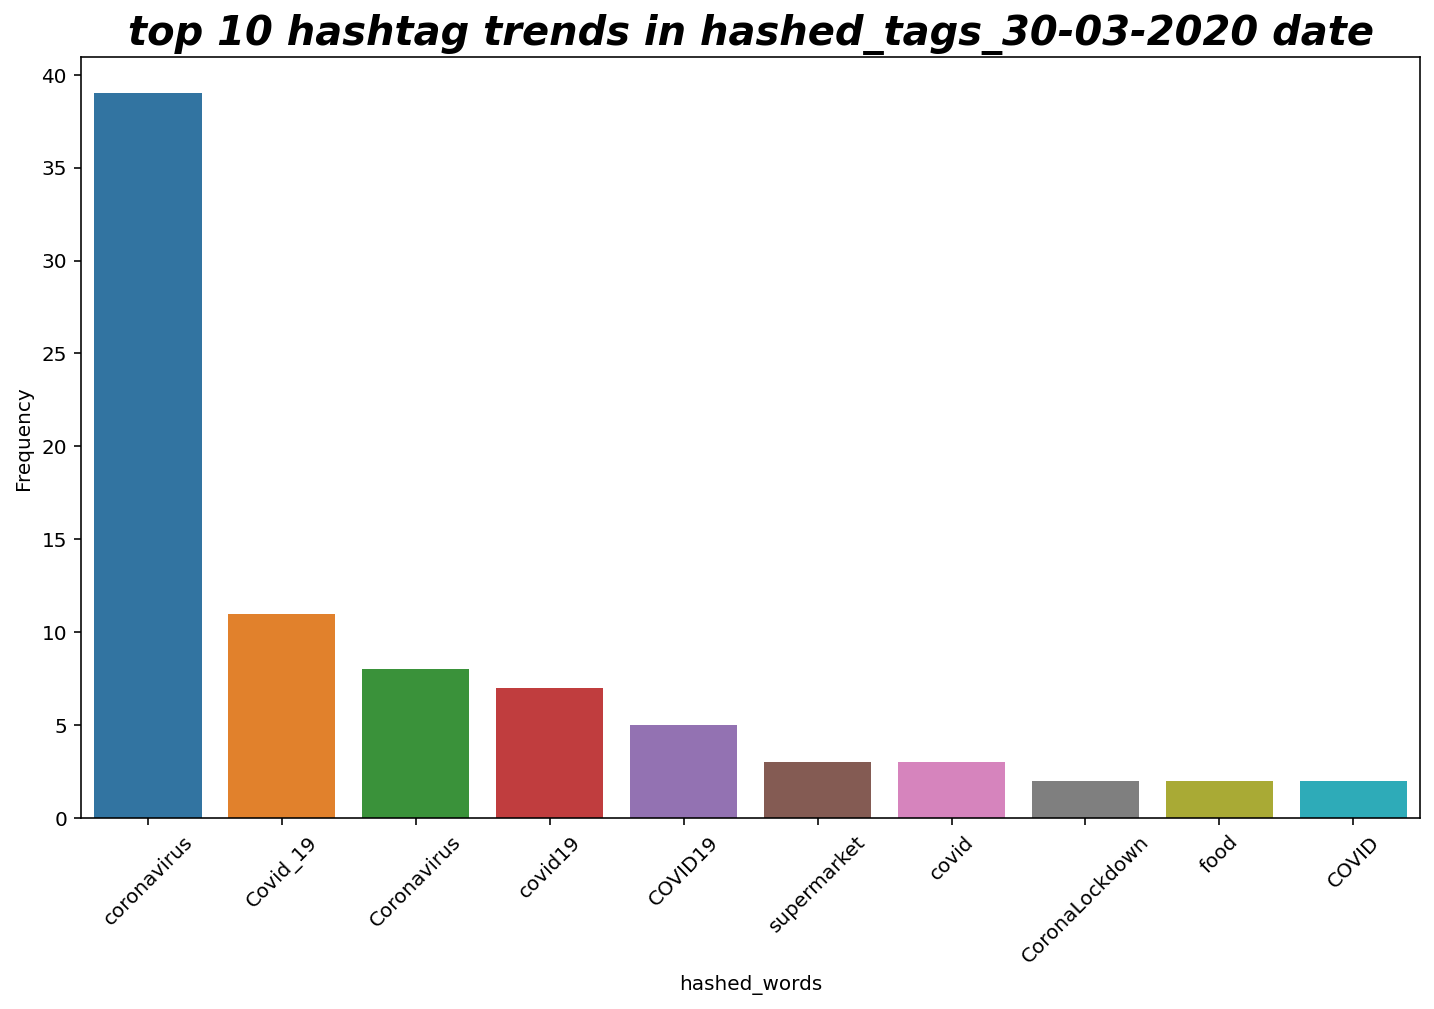

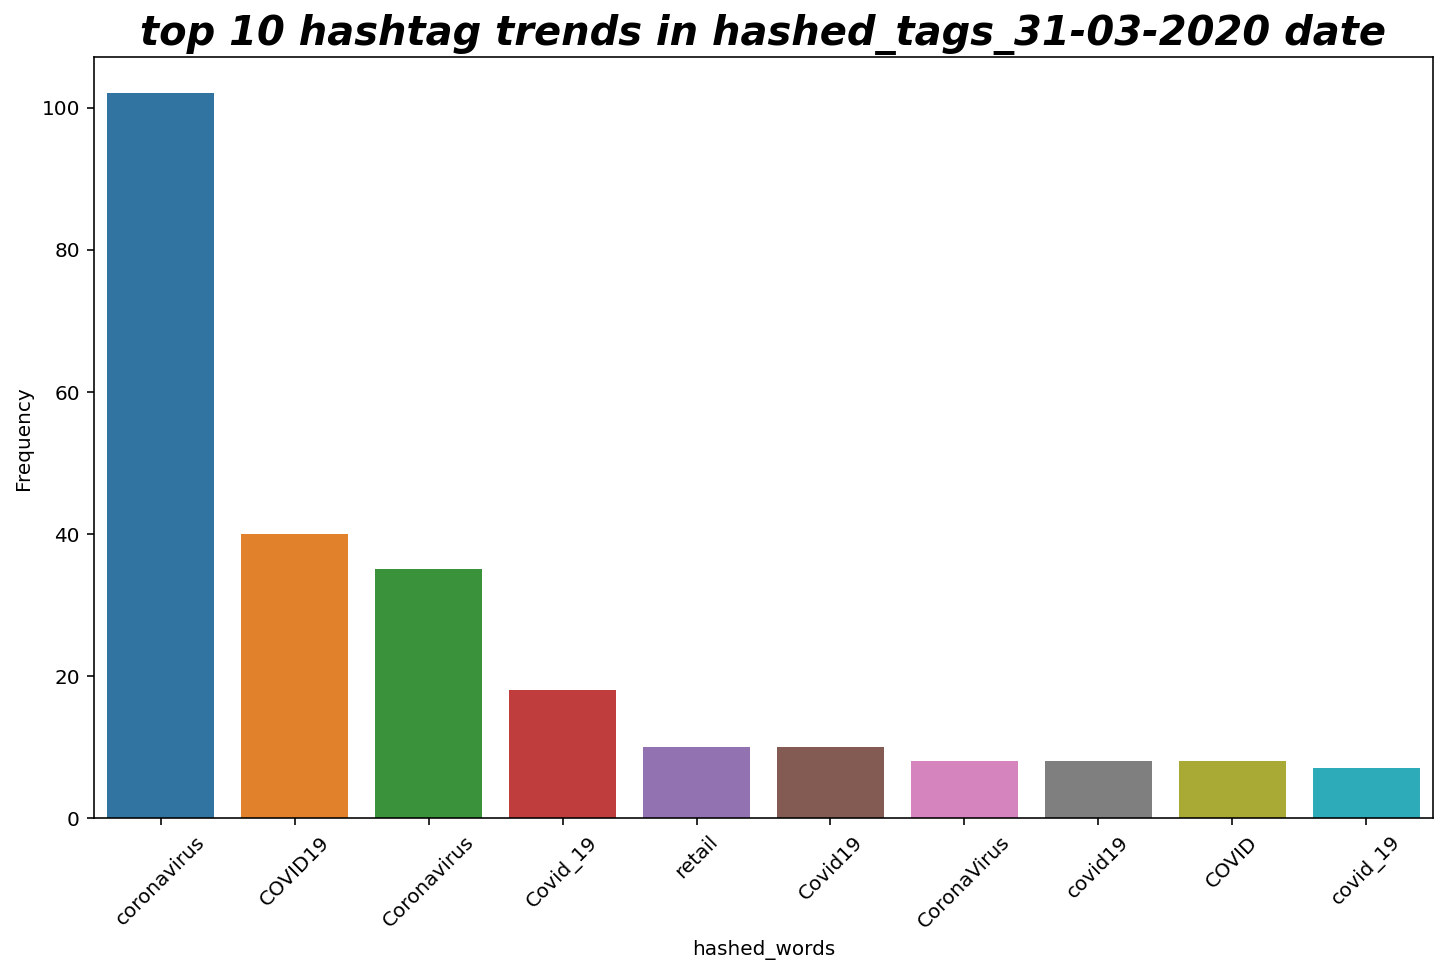

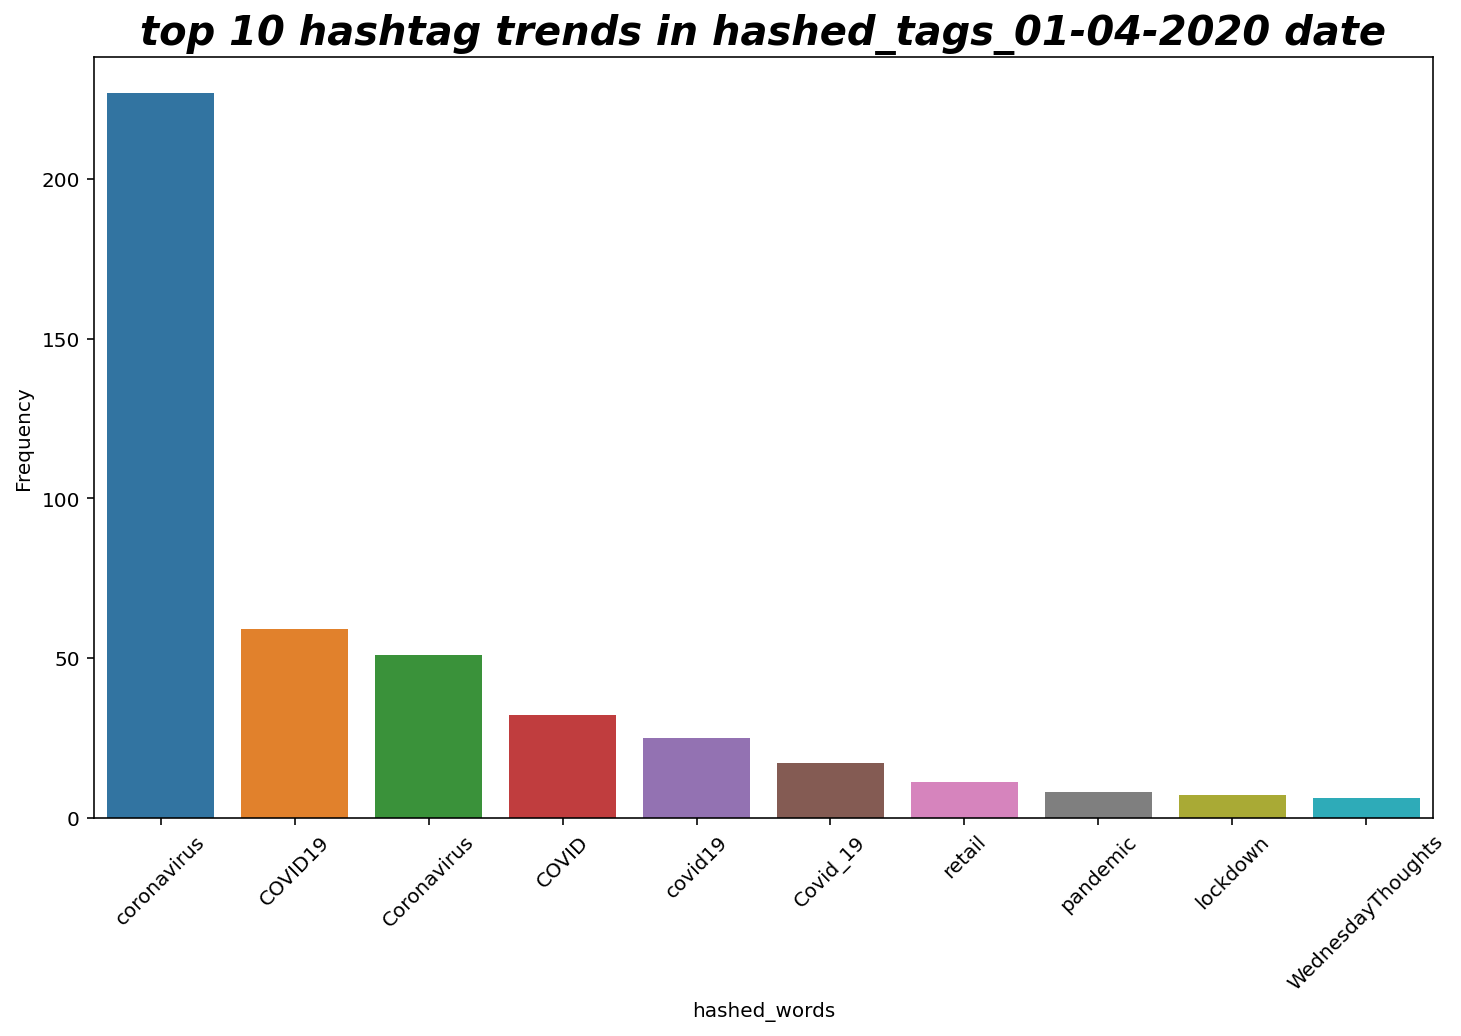

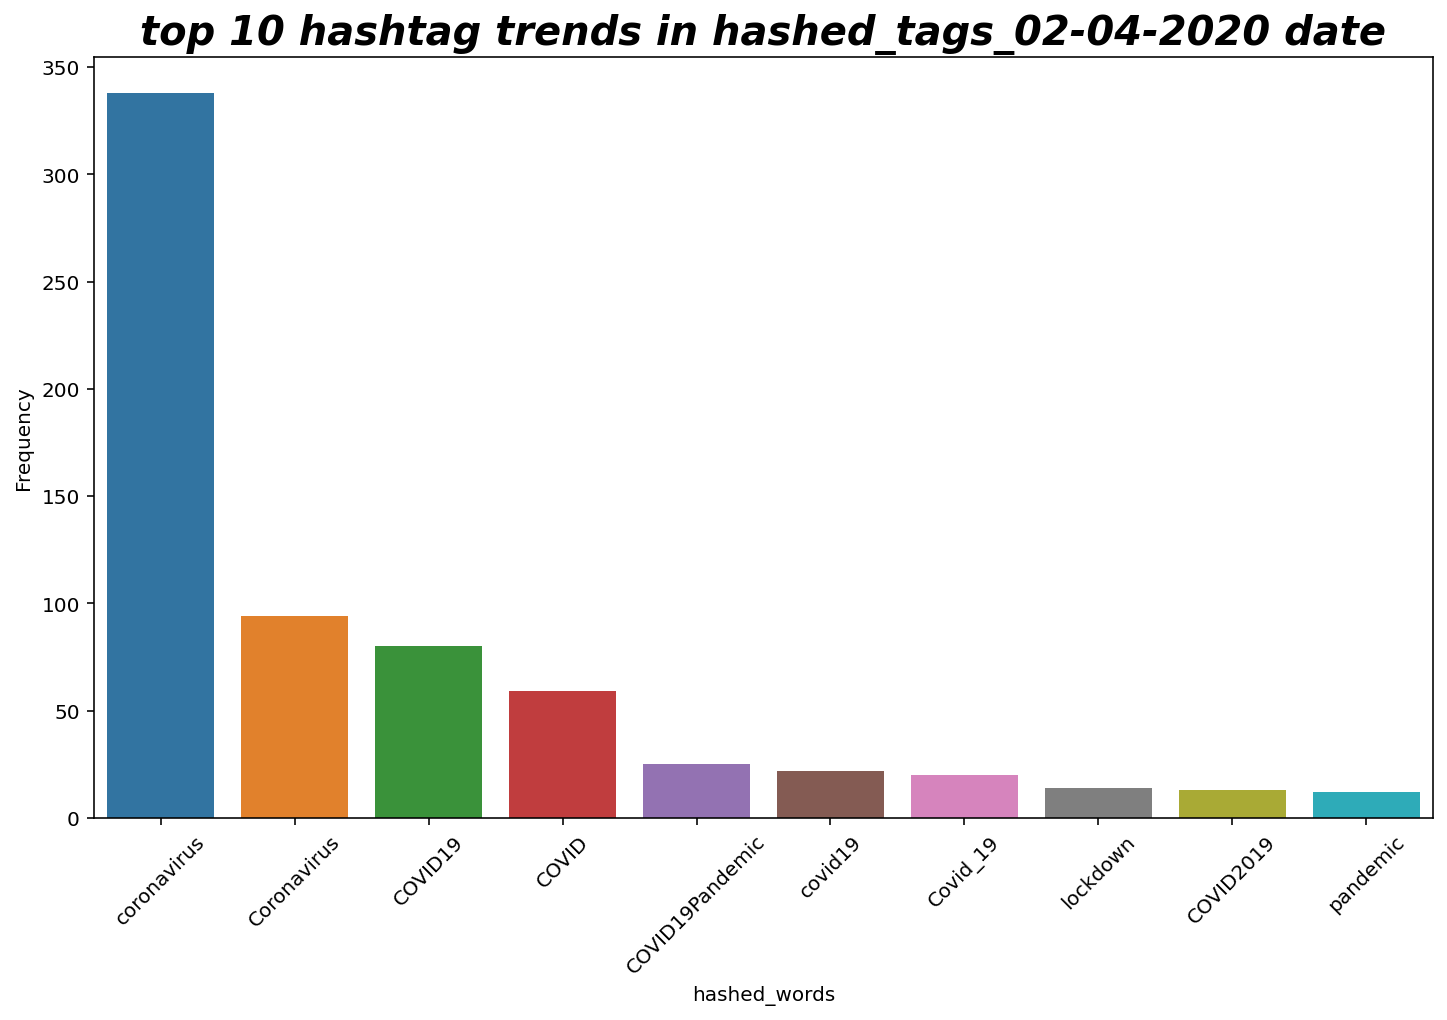

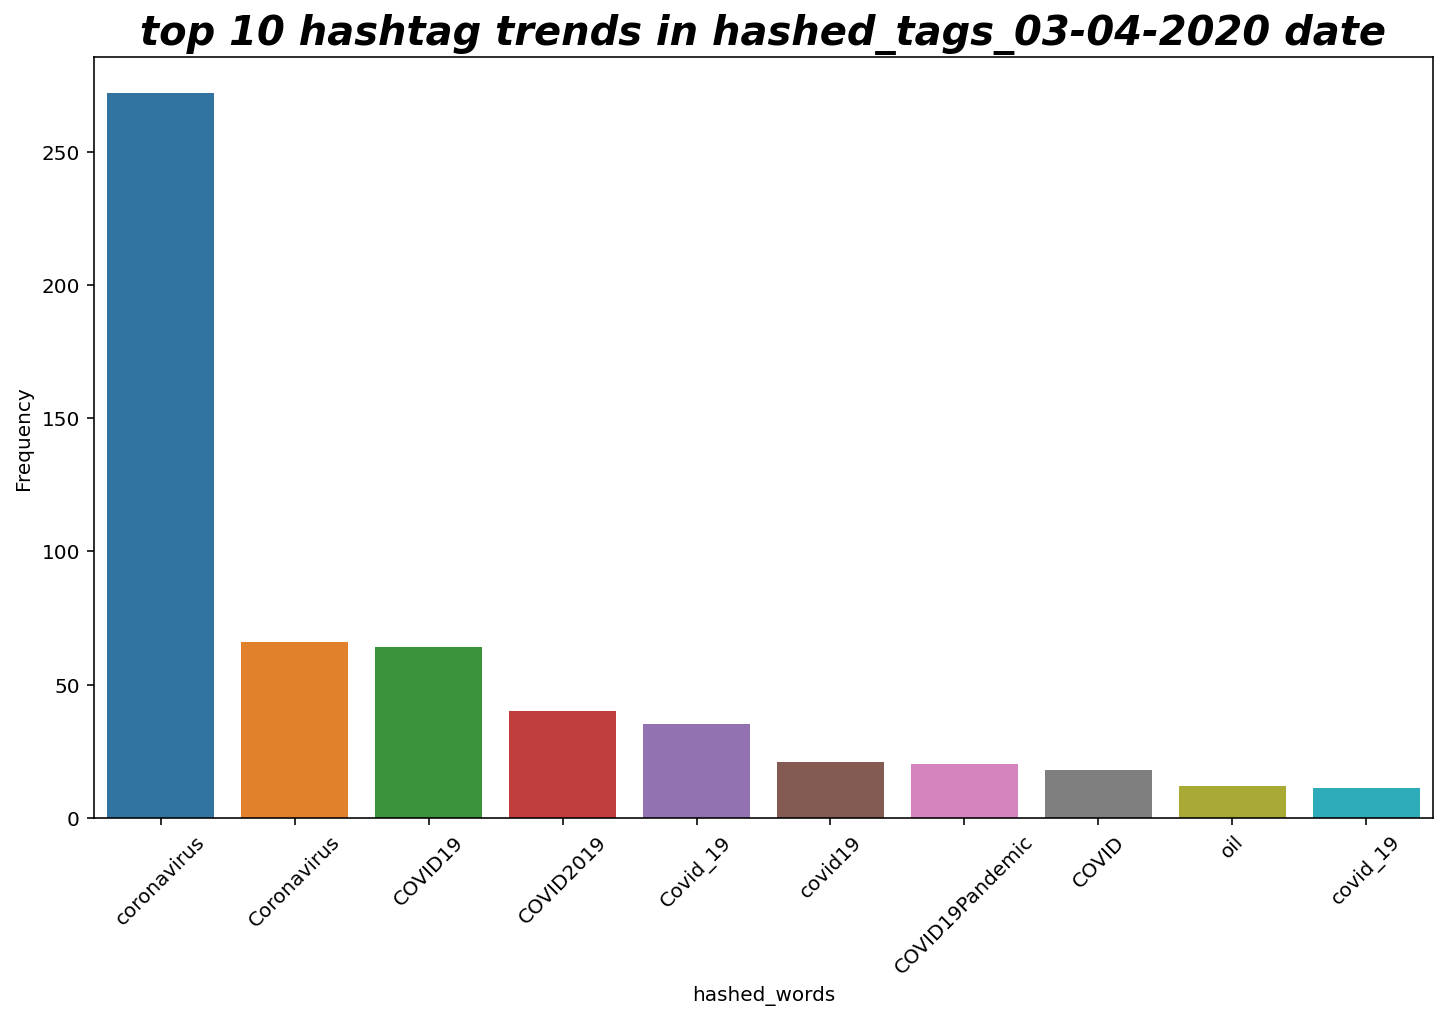

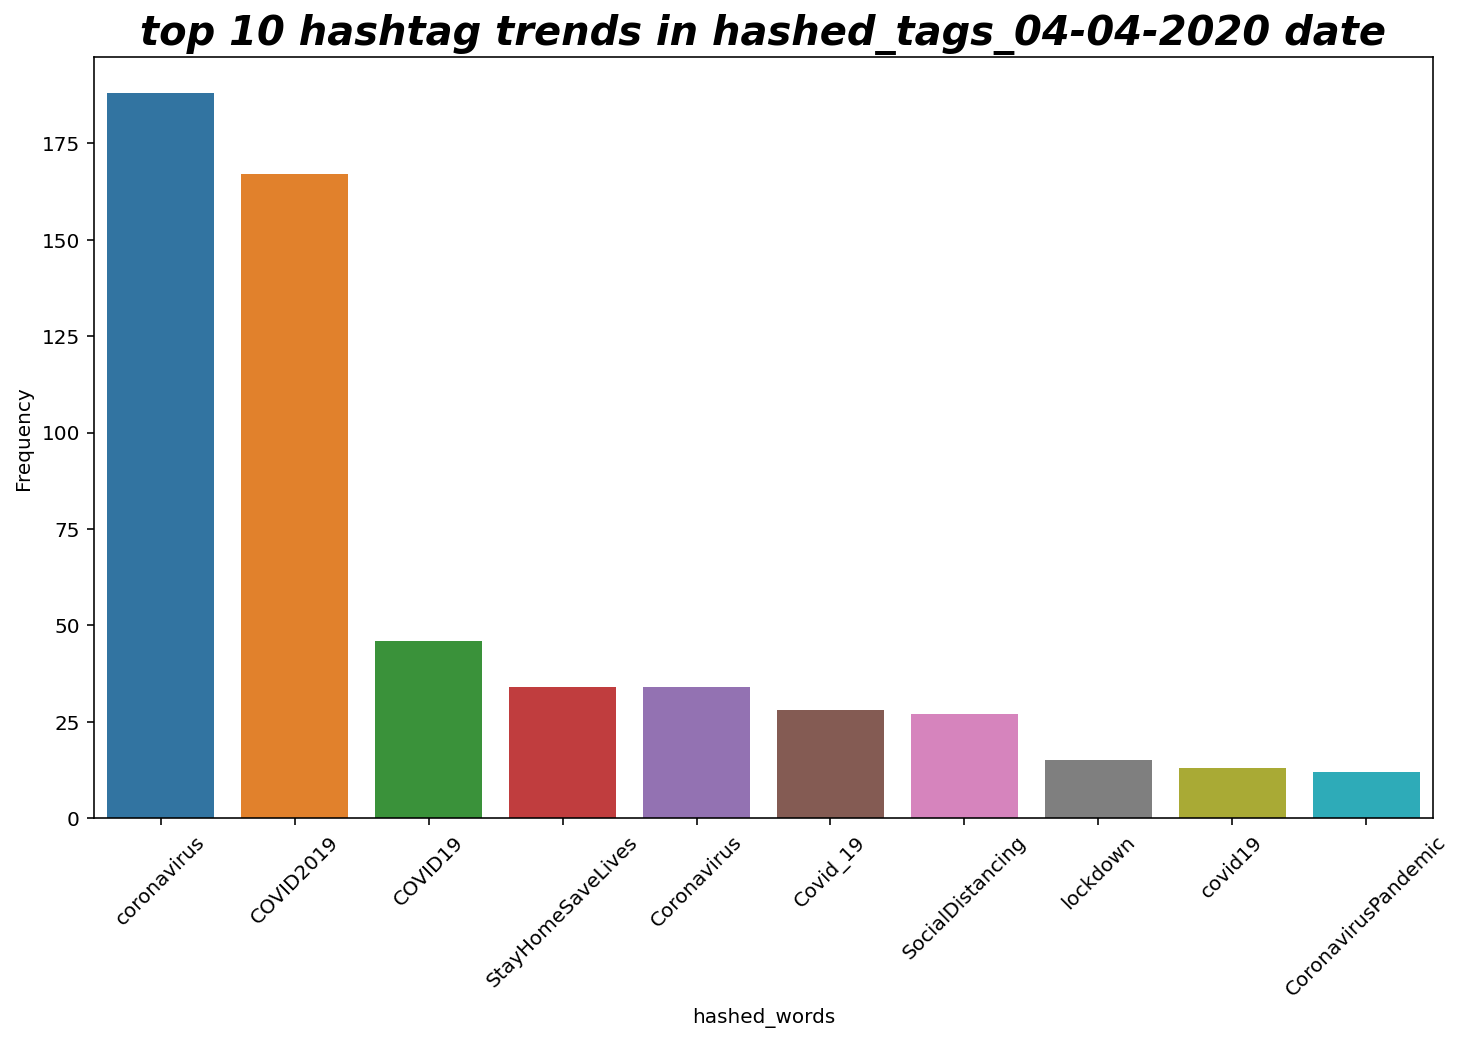

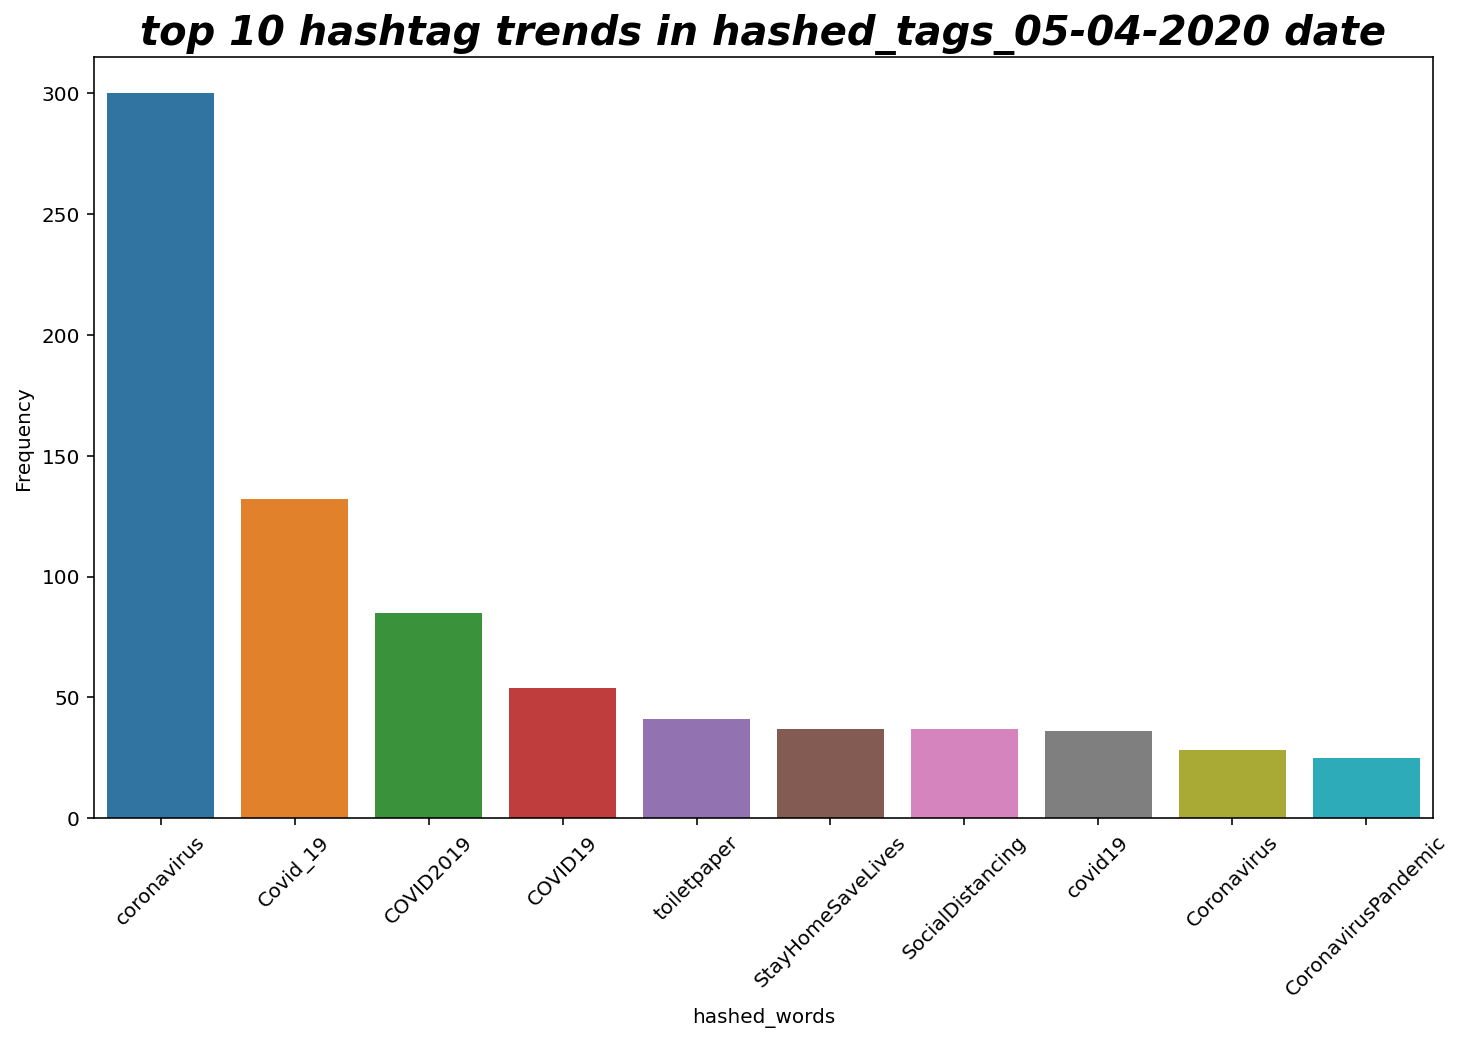

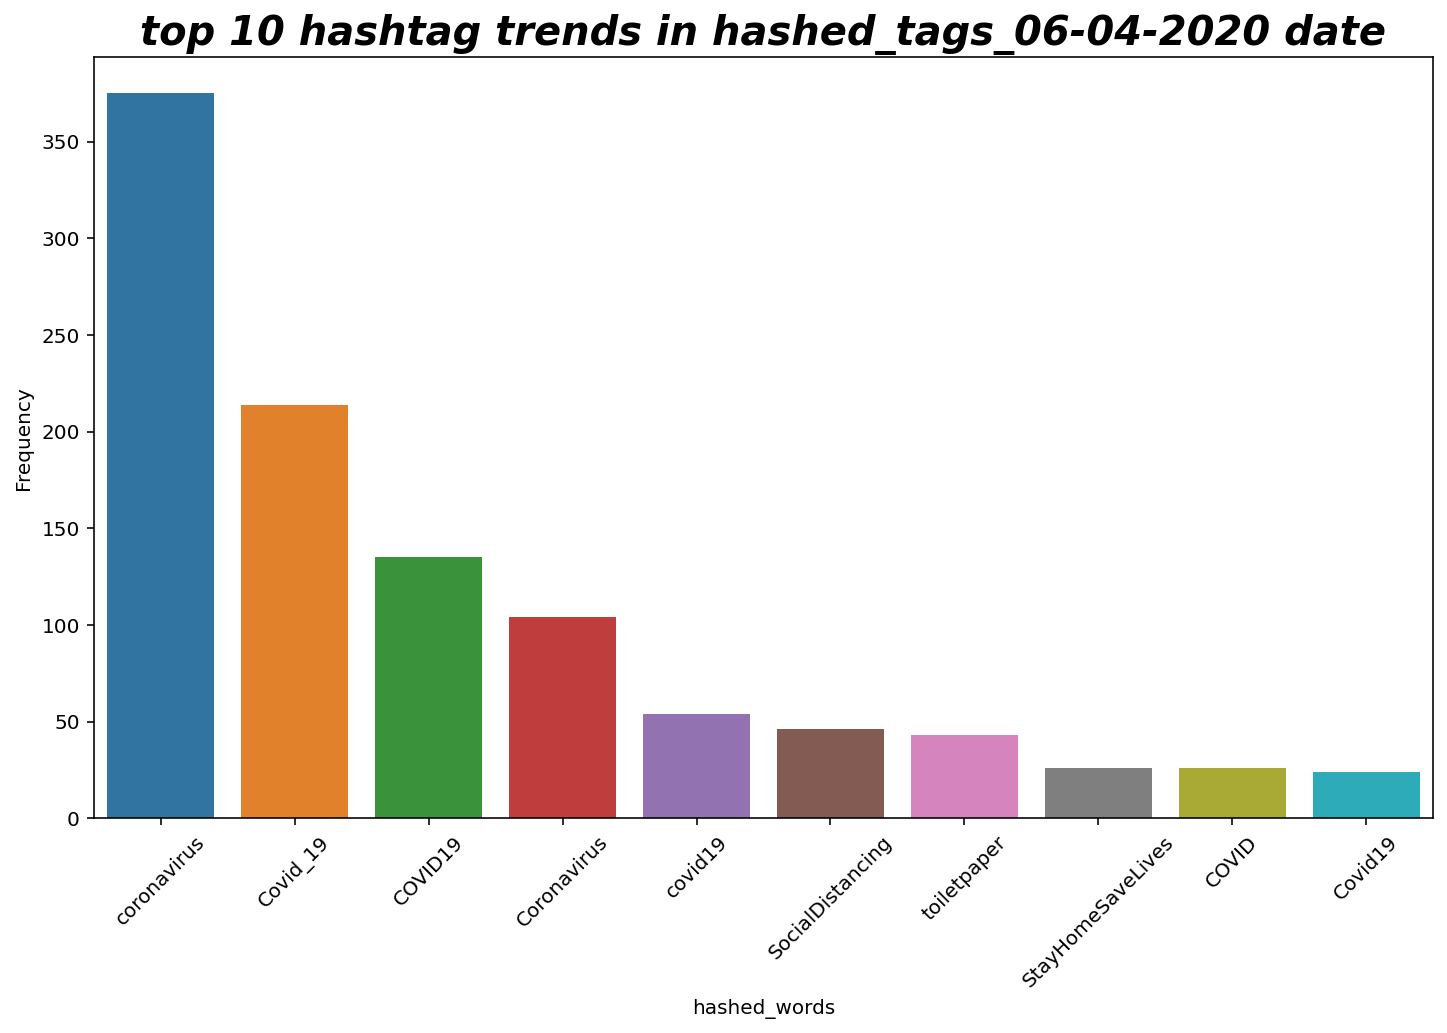

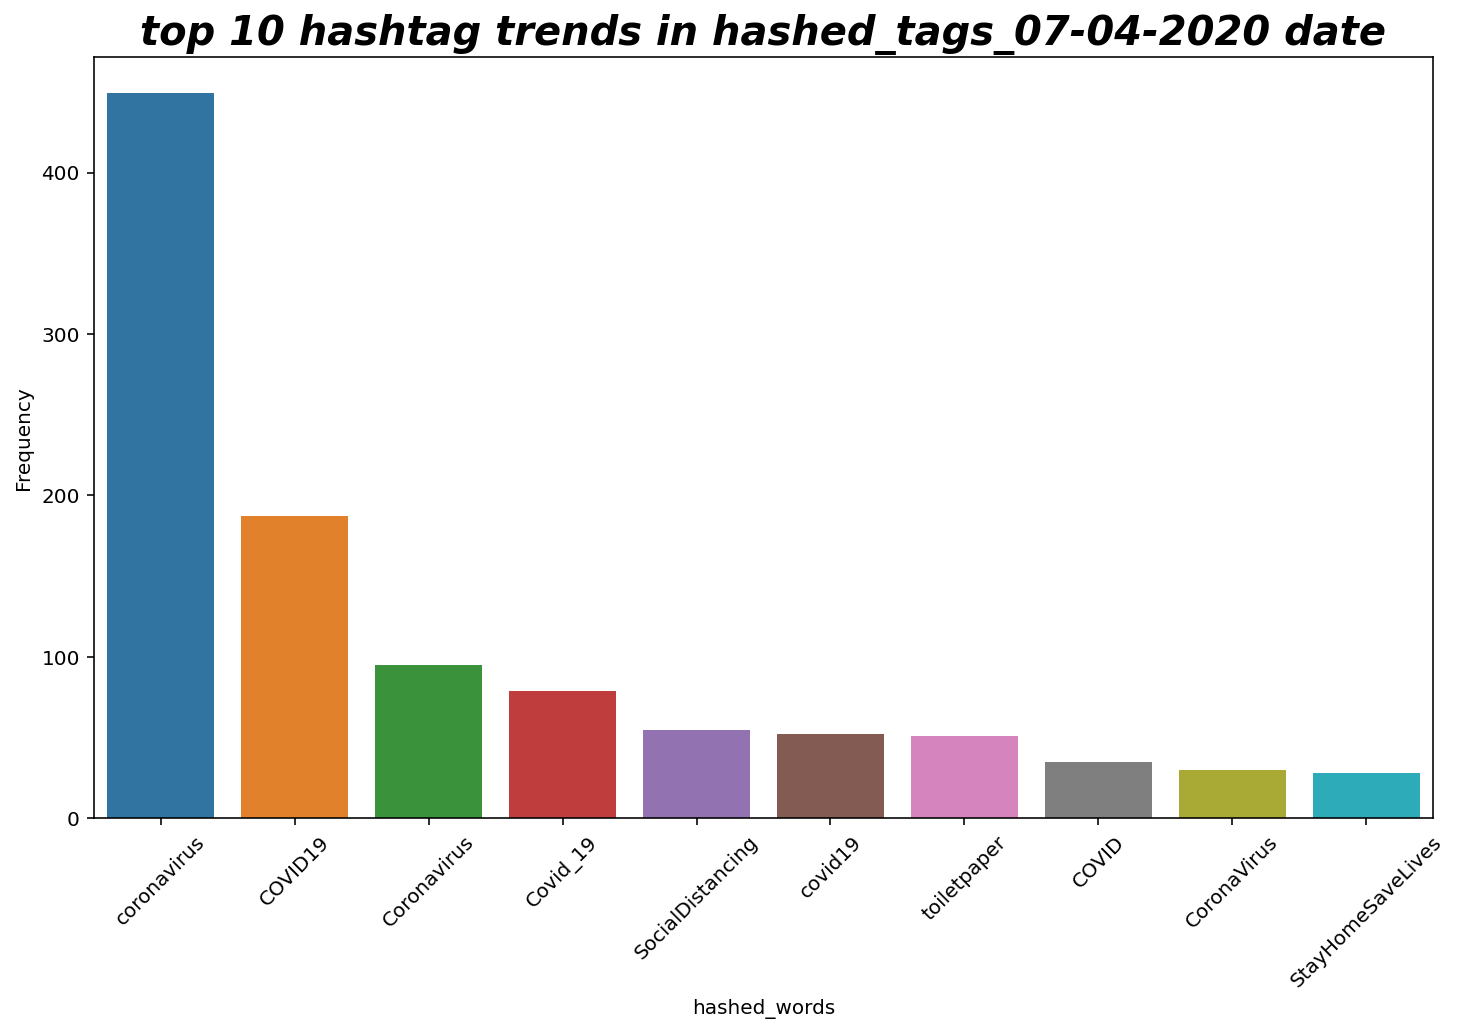

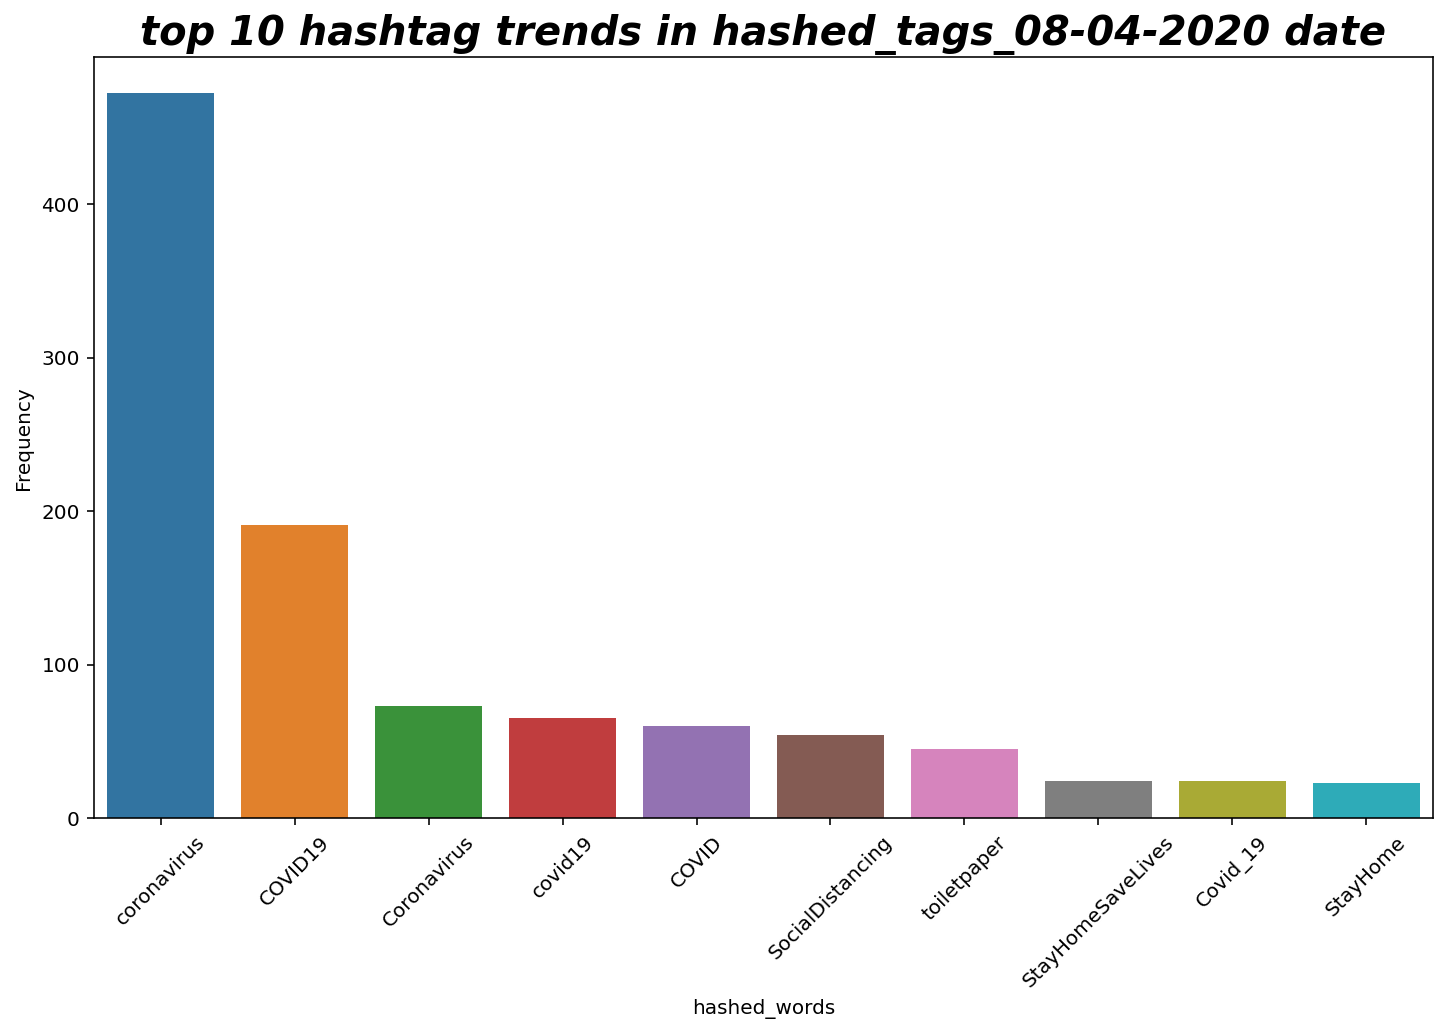

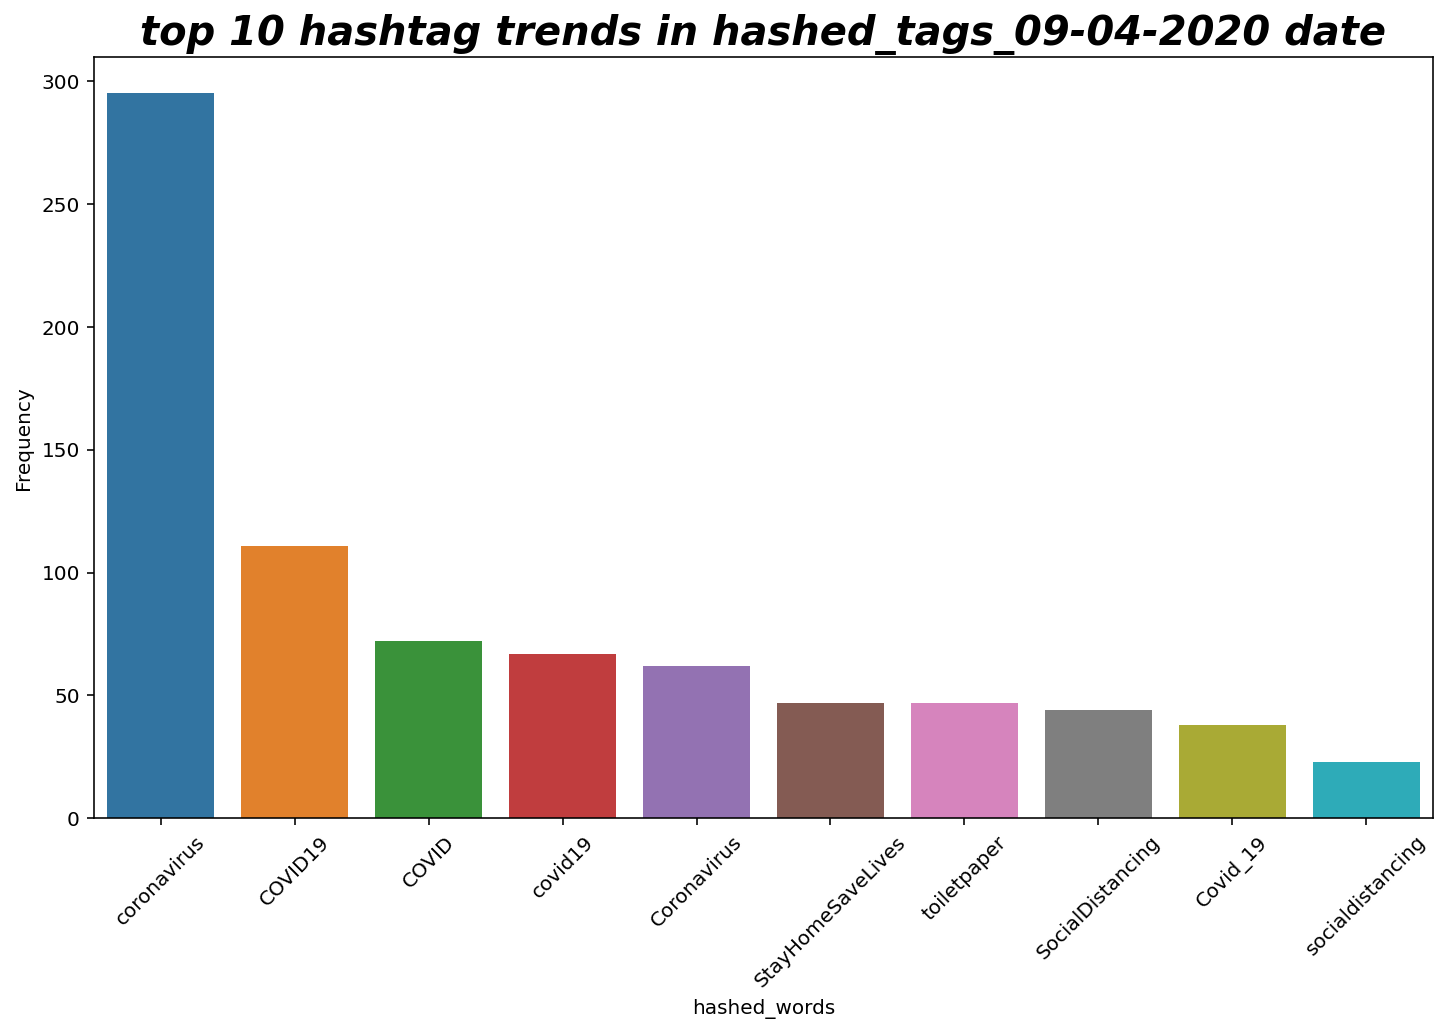

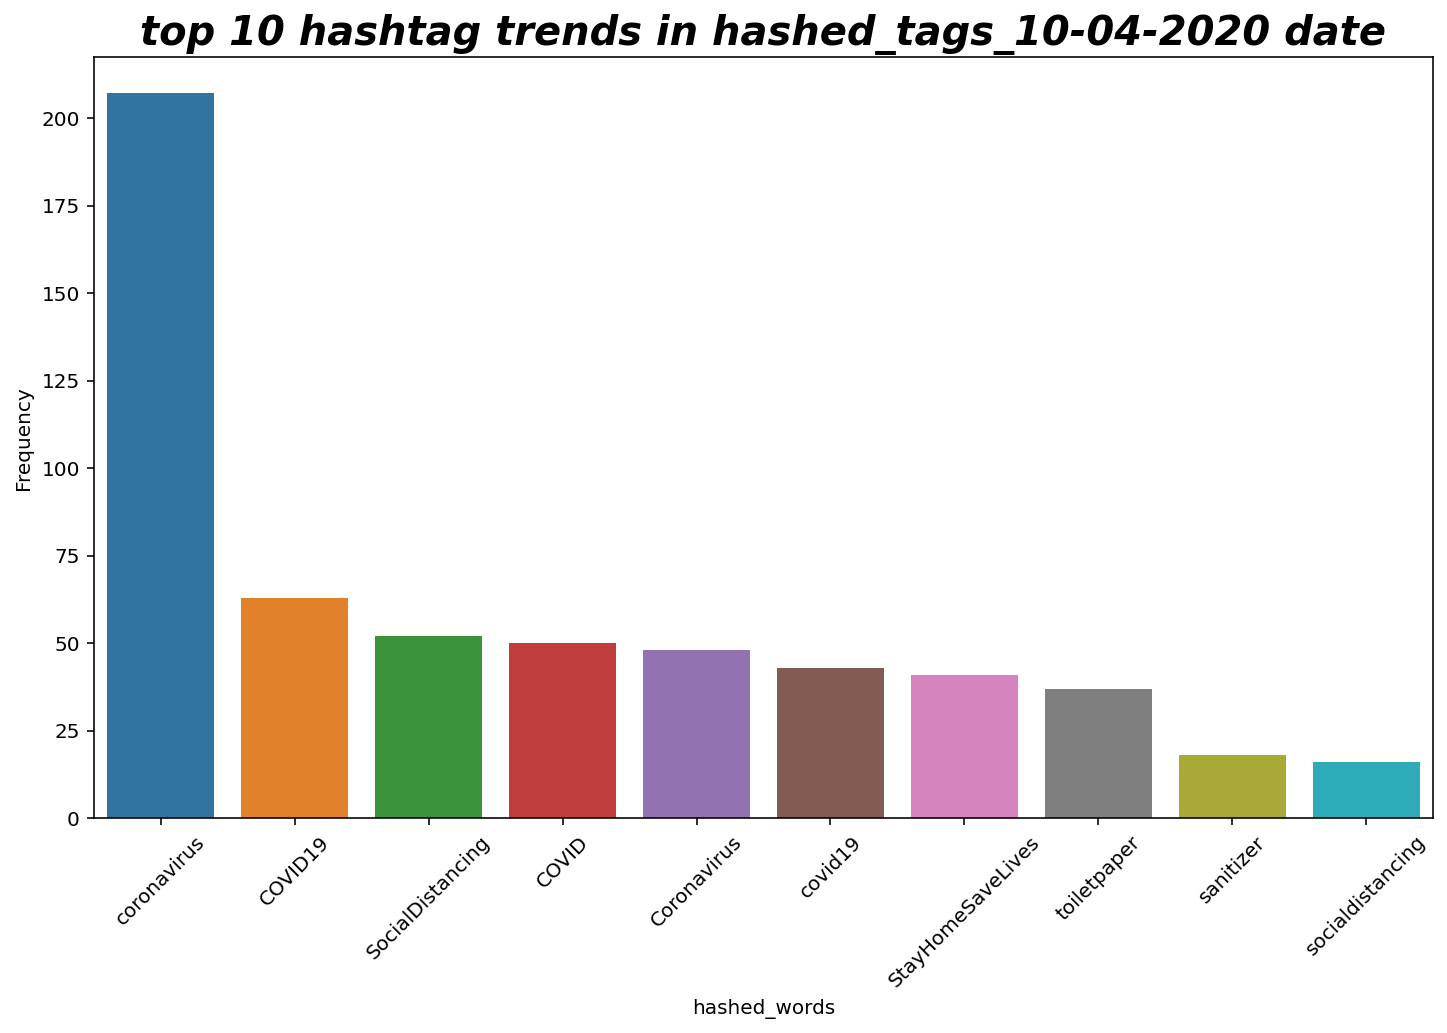

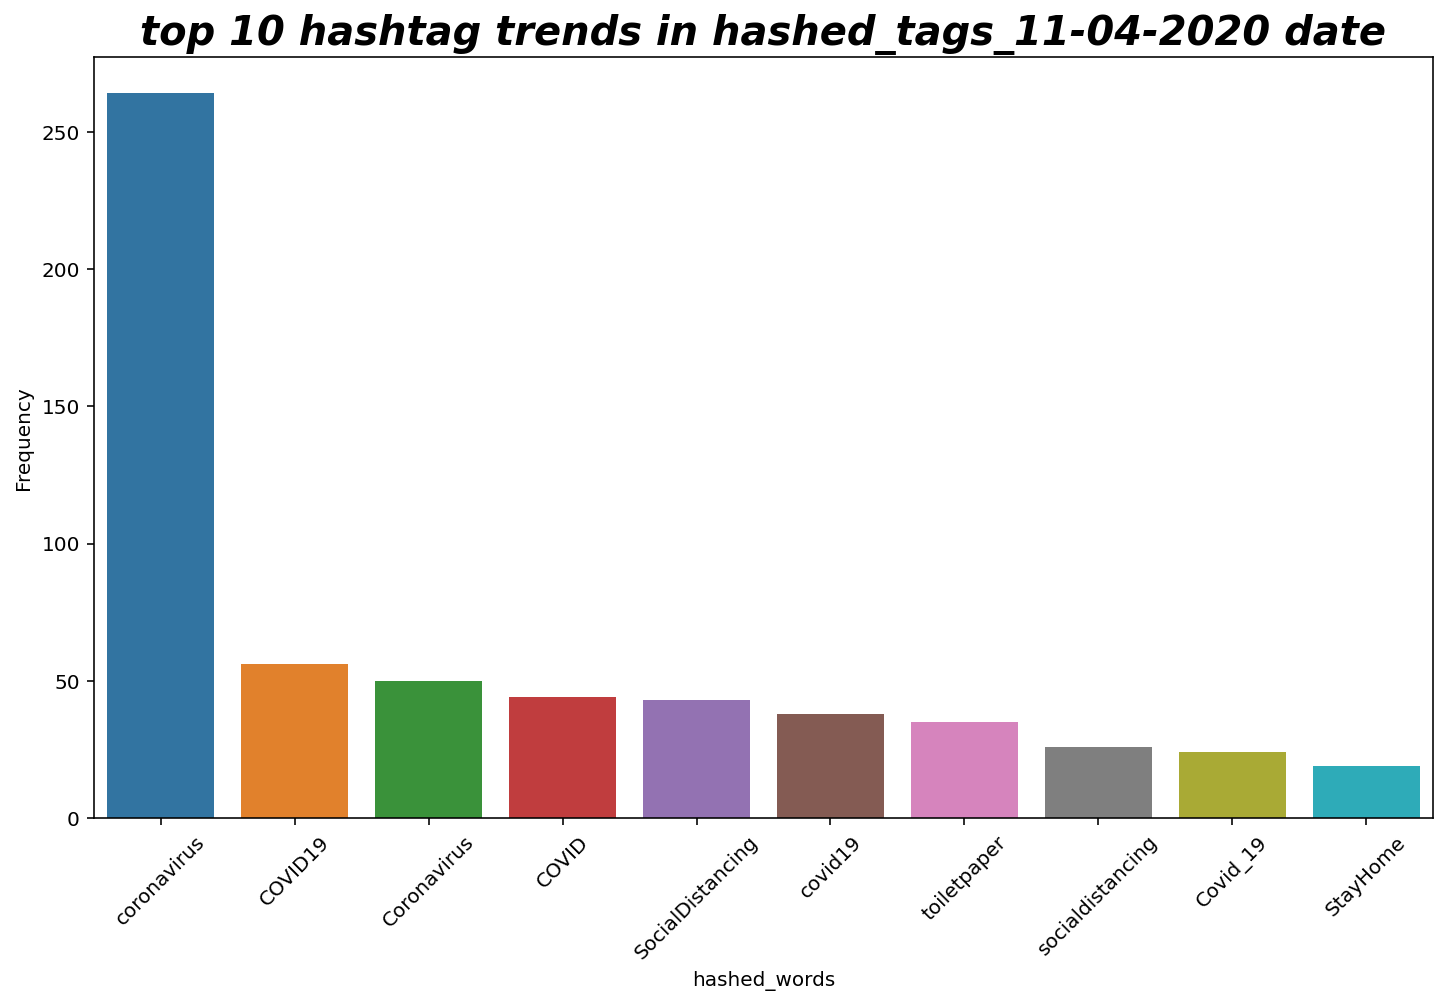

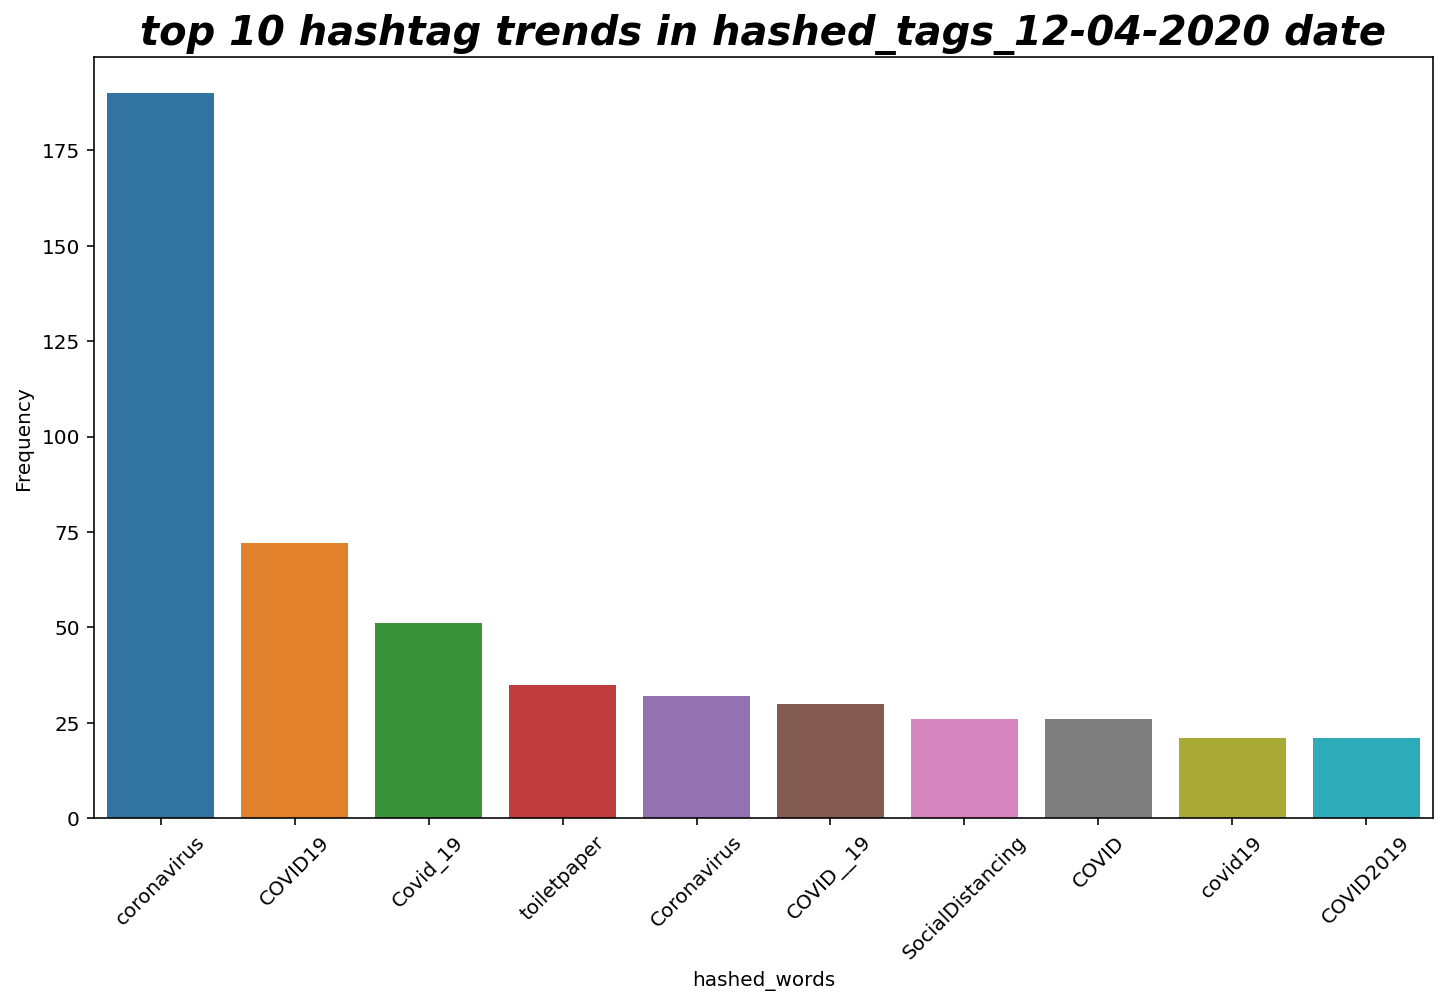

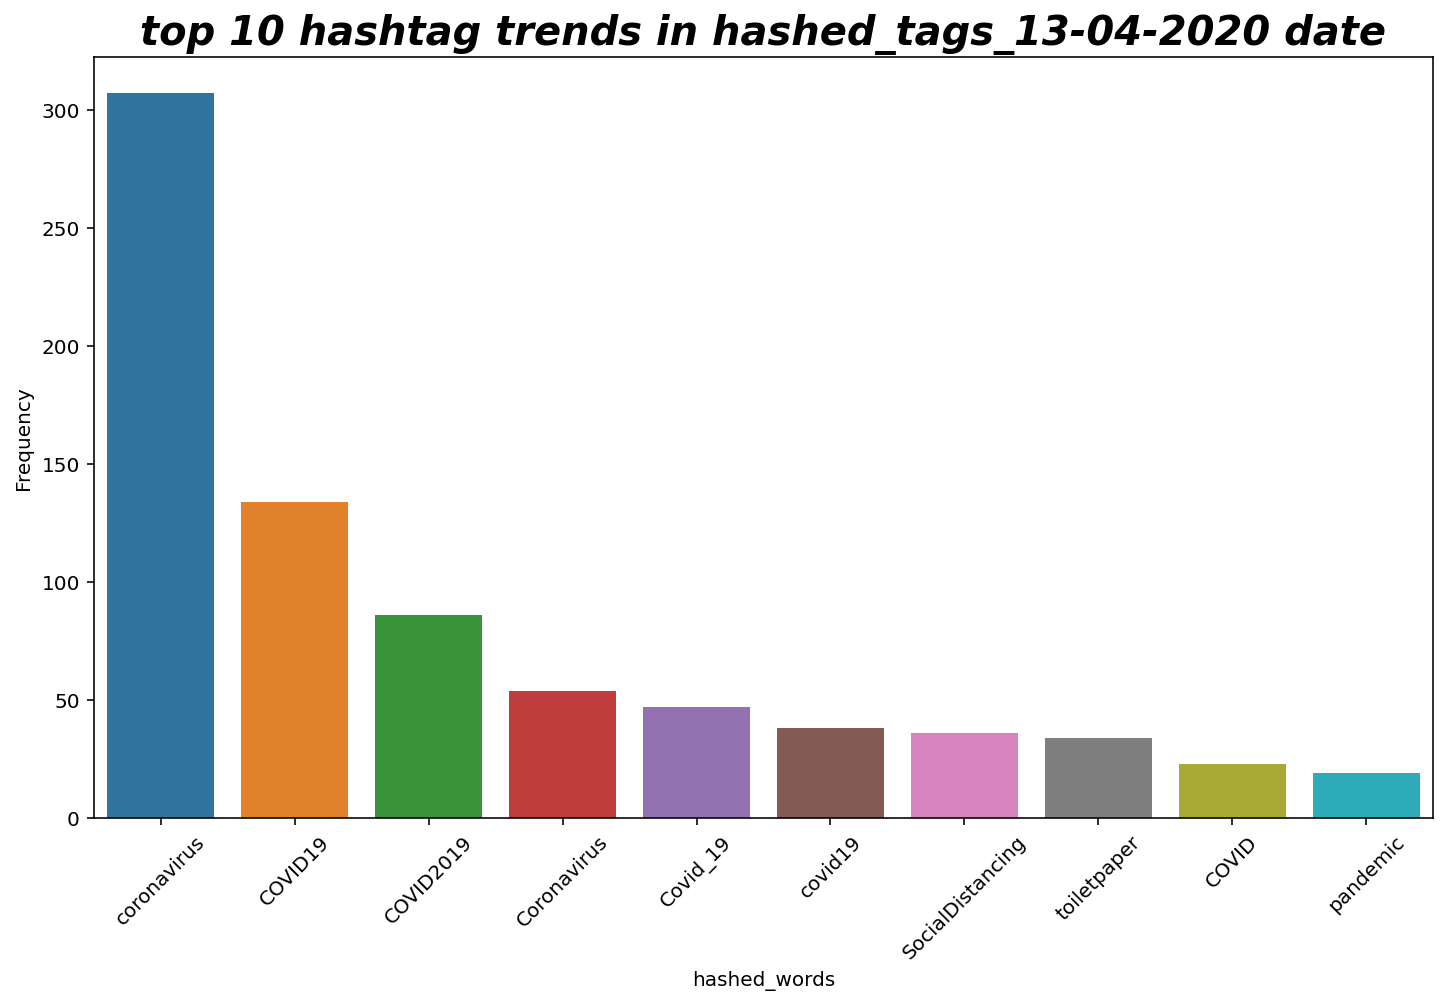

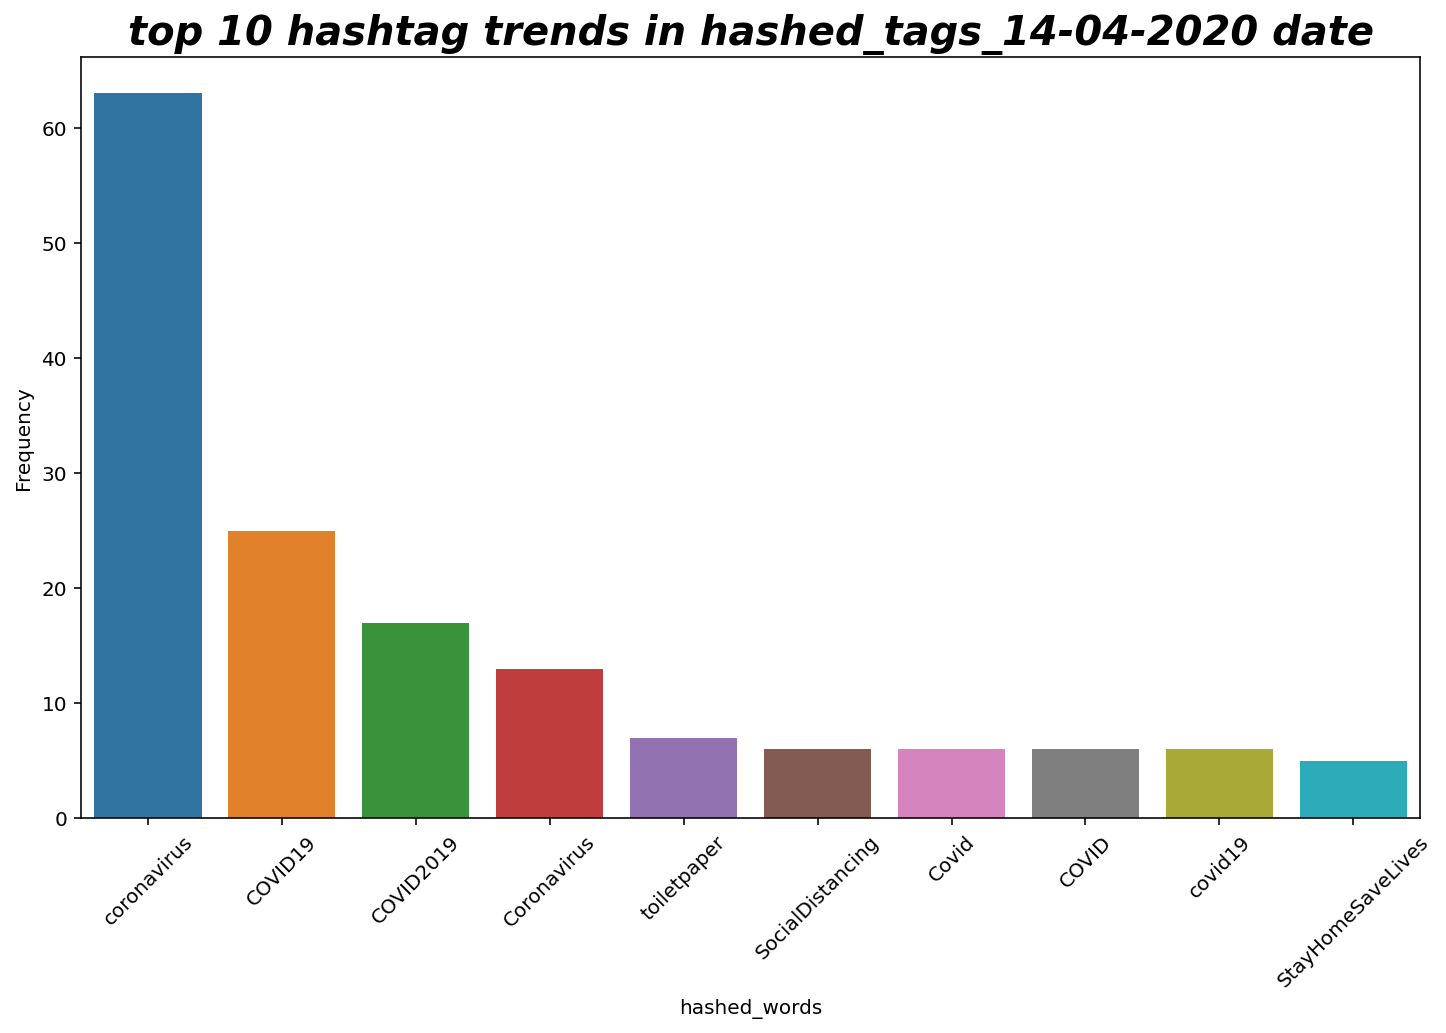

In [ ]:
for date in hashed_dict_tweet_date.keys():
  freq_dist_tags = nltk.FreqDist(hashed_dict_tweet_date[date])
  freq_dist_df = pd.DataFrame({'hashed_words': list(freq_dist_tags.keys()),
                    'Frequency' : list(freq_dist_tags.values())})

  plt.figure(figsize = (12,7))
  sns.barplot(data =freq_dist_df.nlargest(columns = 'Frequency', n = 10), x = 'hashed_words', y = 'Frequency')
  plt.title(f'top 10 hashtag trends in {date} date',fontweight='bold',fontstyle='italic',fontsize=20)
  plt.xticks(rotation=45)
  plt.show()
  print('\n')

####Vectorization of the words

In [ ]:
# encoding = {'Neutral': 0,'Positive': 1,'Extremely Positive': 2,'Negative': -1,'Extremely Negative': -2}

In [ ]:
new_df  = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Coronavirus Tweets Sentiment Analysis/Cleaned_tweets.csv')

In [ ]:
new_df = new_df.fillna('')

In [ ]:
new_df.head()

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(new_df['cleaned_tweet']).toarray()
y = new_df['Sentiment'].values

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
def models():
  '''
  This Function returns a dictionary of Classification Algorithms 
  '''
  models = dict()
  
  models['Naive Bayes'] = MultinomialNB()
  models['Logistic Regression'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['Decision Tree'] = DecisionTreeClassifier()
  models['XGBoost'] = XGBClassifier()
  models['Extra Trees Classifier'] = ExtraTreesClassifier()
  models['Random Forest'] = RandomForestClassifier()
  models['CatBoost Classifier'] = CatBoostClassifier()

  return models

In [ ]:
def model_predictions(models,X_train,X_test,y_train):
    '''
    This function is used for training and testing our list of models, 
    which is used for returning training and testing predictions those in turn used for evaluation.  
    '''
    names=[]
    training_preds = []
    test_preds = []
    
    for name, model in models.items():                               # Looping over our list of models
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train).tolist()
        training_preds.append(train_pred)
        names.append(name)

        file=open(f"{name}.pkl", "wb")                               # Pickling our models for future uttlity
        pickle.dump(model, file)
        
        test_pred = model.predict(X_test).tolist()
        test_preds.append(test_pred)

        
     
    training_pred_dict = dict(zip(names, training_preds))           # Zipping our models and their 
                                                                     # corresponding training predictions into a dictionary.
    
    train_pred_df = pd.DataFrame.from_dict(training_pred_dict)       # We're converting the above dictionary to a DataFrame.
    
    
    test_pred_dict = dict(zip(names, test_preds))                    # Zipping our models and their 
                                                                     # corresponding test predictions into a dictionary.
    
    test_pred_df = pd.DataFrame.from_dict(test_pred_dict)           # We're converting the above dictionary to a DataFrame.
    
    return train_pred_df,test_pred_df

In [ ]:
def evaluation_function(y_train, y_test, train_pred_df, test_pred_df, metric_name):
    '''
    This function is used to compute the Evaluation Metrics for traing and test predictions of our list of models 
    '''
    models = train_pred_df.columns.tolist()

    metrics_train = []
    metrics_test = []
    for model in models:
        if metric_name == 'Recall': # Mean Squarred Error
            metric_train = metrics.recall_score(y_train, train_pred_df[model],average='weighted')  
            metric_test = metrics.recall_score(y_test, test_pred_df[model],average='weighted')  

        elif metric_name == 'Precision': # Root Mean Squarred Error
            metric_train = metrics.precision_score(y_train, train_pred_df[model],average='weighted')
            metric_test = metrics.precision_score(y_test, test_pred_df[model],average='weighted')

        elif metric_name == 'F1_score': # Root Mean Squarred Logerithmic Error
            metric_train = metrics.f1_score(y_train, train_pred_df[model],average='weighted')
            metric_test = metrics.f1_score(y_test, test_pred_df[model],average='weighted')  

        elif metric_name == 'Accuracy': # R-squarred Score
            metric_train = metrics.accuracy_score(y_train, train_pred_df[model])
            metric_test = metrics.accuracy_score(y_test, test_pred_df[model])

        metrics_train.append(metric_train)
        metrics_test.append(metric_test)

    metrics_train_dict = dict(zip(models, metrics_train))  # Zipping our models and their corresponding 
                                                           # Evaluation results of training predictions into a dictionary.

    metrics_test_dict = dict(zip(models,metrics_test))  # Zipping our models and their corresponding 
                                                        # Evaluation results of test predictions into a dictionary.
    
    metrics_dict={'train':metrics_train_dict,
                 'test':metrics_test_dict}
    metrics_df = pd.DataFrame(metrics_dict)    # Converting our metric dictionaries into a DataFrame.
    metrics_df = metrics_df.transpose()        # Transposing the above DataFrame for our convenience
    metrics_df['Evaluation'] = metric_name     
    first_col = metrics_df.pop('Evaluation')
    metrics_df.insert(0, 'Evaluation', first_col)
    return metrics_df

In [ ]:
#Prediction
train_pred_df,test_pred_df = model_predictions(models(),X_train,X_test,y_train)

In [ ]:
metrics_df = evaluation_function(y_train, y_test, train_pred_df, test_pred_df,'Accuracy')
metrics_df